In [4]:
!git clone https://github.com/Seprishi/Learning.git

Cloning into 'Learning'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 104 (delta 34), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (104/104), 37.87 MiB | 2.55 MiB/s, done.
Resolving deltas: 100% (34/34), done.
Updating files: 100% (15/15), done.


In [5]:
import pandas as pd
import glob
import os
import warnings
from pathlib import Path
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries loaded successfully")



enrolmentpath = r"/content/Learning/Data/api_data_aadhar_enrolment"
demograpicpath = r"/content/Learning/Data/api_data_aadhar_demographic"
biometricpath = r"/content/Learning/Data/api_data_aadhar_biometric"


Libraries loaded successfully


# DataSet Details

There are 3 different types of Data Available:
1> ENROLMENT DATA
2> DEMOGRAPHIC DATA
3> BIOMETRIC DATA

The datasets among these groups contains details of the enrolment in different states, Post code, Age Group, Demographics of the age group and Biometrc details of the different age group.


In [6]:
# Load all enrollment CSVs
enrollment_files = glob.glob(enrolmentpath + r"/*.csv")
print(f"📁 Found {len(enrollment_files)} enrollment files:")
for f in enrollment_files:
    print(f"   - {os.path.basename(f)}")

enrol = pd.concat(
    [pd.read_csv(f) for f in enrollment_files],
    ignore_index=True
)
print(f"\n✅ Enrollment DataFrame created: {enrol.shape[0]:,} rows × {enrol.shape[1]} columns")

📁 Found 3 enrollment files:
   - api_data_aadhar_enrolment_1000000_1006029.csv
   - api_data_aadhar_enrolment_0_500000.csv
   - api_data_aadhar_enrolment_500000_1000000.csv

✅ Enrollment DataFrame created: 1,006,029 rows × 7 columns


In [7]:
# Load all enrollment CSVs
demographic_files = glob.glob(demograpicpath + r"/*.csv")
print(f"📁 Found {len(demographic_files)} demographic files:")
for f in demographic_files:
    print(f"   - {os.path.basename(f)}")

demographic = pd.concat(
    [pd.read_csv(f) for f in demographic_files],
    ignore_index=True
)
print(f"\n✅ Demographic DataFrame created: {demographic.shape[0]:,} rows × {demographic.shape[1]} columns")

📁 Found 5 demographic files:
   - api_data_aadhar_demographic_1500000_2000000.csv
   - api_data_aadhar_demographic_1000000_1500000.csv
   - api_data_aadhar_demographic_2000000_2071700.csv
   - api_data_aadhar_demographic_500000_1000000.csv
   - api_data_aadhar_demographic_0_500000.csv

✅ Demographic DataFrame created: 2,071,700 rows × 6 columns


In [8]:
# Load all biometric CSVs
biometric_files = glob.glob(biometricpath + r"/*.csv")
print(f"📁 Found {len(biometric_files)} biometric files:")
for f in biometric_files:
    print(f"   - {os.path.basename(f)}")

bio = pd.concat(
    [pd.read_csv(f) for f in biometric_files],
    ignore_index=True
)
print(f"\n✅ Biometric DataFrame created: {bio.shape[0]:,} rows × {bio.shape[1]} columns")

📁 Found 4 biometric files:
   - api_data_aadhar_biometric_1000000_1500000.csv
   - api_data_aadhar_biometric_0_500000.csv
   - api_data_aadhar_biometric_500000_1000000.csv
   - api_data_aadhar_biometric_1500000_1861108.csv

✅ Biometric DataFrame created: 1,861,108 rows × 6 columns


# Data Processing and Cleansing of the Enrolment Dataset

### View the first & Last 5 rows of the Enrolment dataset

In [9]:
enrol.head(5)

date      state district  pincode  age_0_5  age_5_17  age_18_greater
0  31-12-2025  Karnataka    Bidar   585330        2         3               0
1  31-12-2025  Karnataka    Bidar   585402        6         0               0
2  31-12-2025  Karnataka    Bidar   585413        1         0               0
3  31-12-2025  Karnataka    Bidar   585418        1         2               0
4  31-12-2025  Karnataka    Bidar   585421        4         3               0

In [10]:
enrol.tail(5)

date      state   district  pincode  age_0_5  age_5_17  \
1006024  31-12-2025  Telangana  Hyderabad   500045        4         5   
1006025  31-12-2025  Telangana  Hyderabad   500057        0         2   
1006026  31-12-2025  Telangana  Hyderabad   500061        4         2   
1006027  31-12-2025  Telangana  Hyderabad   500062        1         4   
1006028  31-12-2025  Telangana  Hyderabad   500095        0         1   

         age_18_greater  
1006024               1  
1006025               0  
1006026               0  
1006027               0  
1006028               0

## Check data types and number of non-null values for each column

In [11]:
enrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [12]:
enrol.shape

(1006029, 7)

In [13]:
enrol.isna().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [14]:
enrol.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

### Statistical Summary of Data

In [15]:
enrol.describe().T

count           mean            std       min       25%  \
pincode         1006029.0  518641.454930  205635.970416  100000.0  363641.0   
age_0_5         1006029.0       3.525709      17.538511       0.0       1.0   
age_5_17        1006029.0       1.710074      14.369625       0.0       0.0   
age_18_greater  1006029.0       0.167344       3.220525       0.0       0.0   

                     50%       75%       max  
pincode         517417.0  700104.0  855456.0  
age_0_5              2.0       3.0    2688.0  
age_5_17             0.0       1.0    1812.0  
age_18_greater       0.0       0.0     855.0

### Unique Values

In [16]:
ColumnNames = ["date", "state", "district", "pincode", "age_0_5", "age_5_17", "age_18_greater"]
for temp in ColumnNames:
      print("----",temp,"--------")
      print(enrol[temp].unique())

---- date --------
['31-12-2025' '02-03-2025' '09-03-2025' '15-03-2025' '20-03-2025'
 '23-03-2025' '26-03-2025' '27-03-2025' '28-03-2025' '29-03-2025'
 '01-04-2025' '01-05-2025' '01-06-2025' '01-07-2025' '01-09-2025'
 '02-09-2025' '03-09-2025' '04-09-2025' '05-09-2025' '06-09-2025'
 '07-09-2025' '08-09-2025' '09-09-2025' '10-09-2025' '11-09-2025'
 '12-09-2025' '13-09-2025' '14-09-2025' '15-09-2025' '16-09-2025'
 '17-09-2025' '18-09-2025' '19-09-2025' '20-09-2025' '21-09-2025'
 '22-09-2025' '23-09-2025' '24-09-2025' '25-09-2025' '26-09-2025'
 '27-09-2025' '28-09-2025' '29-09-2025' '30-09-2025' '13-10-2025'
 '15-10-2025' '16-10-2025' '17-10-2025' '18-10-2025' '19-10-2025'
 '20-10-2025' '21-10-2025' '22-10-2025' '23-10-2025' '24-10-2025'
 '25-10-2025' '26-10-2025' '27-10-2025' '28-10-2025' '29-10-2025'
 '30-10-2025' '31-10-2025' '01-11-2025' '02-11-2025' '03-11-2025'
 '04-11-2025' '05-11-2025' '06-11-2025' '07-11-2025' '08-11-2025'
 '09-11-2025' '10-11-2025' '11-11-2025' '12-11-2025' '13-

## Data Cleansing

In [17]:
enrol['state'] = enrol['state'].str.strip().str.title()
print(enrol['state'].unique())

['Karnataka' 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Orissa' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal'
 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Daman And Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Jammu And Kashmir' 'Jharkhand' 'Pondicherry'
 'The Dadra And Nagar Haveli And Daman And Diu'
 'Dadra And Nagar Haveli And Daman And Diu' 'Andaman And Nicobar Islands'
 'Andaman & Nicobar Islands' 'Dadra & Nagar Haveli'
 'Dadra And Nagar Haveli' 'Jammu & Kashmir' 'West  Bengal' '100000'
 'Daman & Diu' 'West Bangal' 'Westbengal']


In [18]:
enrol['state'] = enrol['state'].replace('West  Bengal', 'West Bengal')
enrol['state'] = enrol['state'].replace('West Bangal', 'West Bengal')
enrol['state'] = enrol['state'].replace('Westbengal', 'West Bengal')
enrol['state'] = enrol['state'].replace('Orissa', 'Odisha')
enrol['state'] = enrol['state'].replace('Puducherry', 'Pondicherry')
enrol['state'] = enrol['state'].replace('Jammu & Kashmir', 'Jammu And Kashmir')
enrol['state'] = enrol['state'].replace('Dadra And Nagar Haveli And Daman And Diu', 'The Dadra And Nagar Haveli And Daman And Diu')
enrol['state'] = enrol['state'].replace('Dadra And Nagar Haveli', 'Dadra & Nagar Haveli')
enrol['state'] = enrol['state'].replace('Daman & Diu', 'Daman And Diu')
enrol['state'] = enrol['state'].replace('Andaman & Nicobar Islands', 'Andaman And Nicobar Islands')
# drop all rows that contain '100000'
enrol = enrol.drop(enrol[enrol['state'] == '100000'].index)

print(enrol['state'].unique())




['Karnataka' 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Pondicherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Daman And Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu And Kashmir' 'Jharkhand'
 'The Dadra And Nagar Haveli And Daman And Diu'
 'Andaman And Nicobar Islands' 'Dadra & Nagar Haveli']


In [19]:
# Find all characters that aren't alphanumeric or spaces
enrol['district'] = enrol['district'].replace('?', 'unknown')
enrol['district'] = enrol['district'].replace('Medchal?Malkajgiri', 'Medchal-Malkajgiri')
enrol['district'] = enrol['district'].replace('Medchalâ\x88\x92malkajgiri', 'Medchal-Malkajgiri')
enrol['district'] = enrol['district'].replace('Medchal?malkajgiri', 'Medchal-Malkajgiri')
enrol['district'] = enrol['district'].replace('Deeg\xa0', 'Deeg')


In [20]:
enrol.shape

(1006007, 7)

# Data Processing and cleansing of the Demographic Dataset

### View the first & Last 5 rows of the Demographic dataset

In [21]:
demographic.head(5)

date      state district  pincode  demo_age_5_17  demo_age_17_
0  18-11-2025  Karnataka    Hasan   573118              0             2
1  18-11-2025  Karnataka    Hasan   573124              1             3
2  18-11-2025  Karnataka    Hasan   573150              0             2
3  18-11-2025  Karnataka   Hassan   573113              0             1
4  18-11-2025  Karnataka   Hassan   573120              1             4

In [22]:
demographic.tail(5)

date        state district  pincode  demo_age_5_17  \
2071695  19-09-2025  Maharashtra   Satara   415212              0   
2071696  19-09-2025  Maharashtra   Satara   415312              0   
2071697  19-09-2025  Maharashtra   Satara   415510              0   
2071698  19-09-2025  Maharashtra   Satara   415511              0   
2071699  19-09-2025  Maharashtra   Satara   415516              0   

         demo_age_17_  
2071695             1  
2071696             5  
2071697             3  
2071698            10  
2071699             3

## Check data types and number of non-null values for each column

In [23]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [24]:
demographic.shape

(2071700, 6)

In [25]:
demographic.isna().sum()

date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

### Statistical Summary of Data

In [26]:
demographic.describe().T

count           mean            std       min       25%  \
pincode        2071700.0  527831.782277  197293.323331  100000.0  396469.0   
demo_age_5_17  2071700.0       2.347552      14.903554       0.0       0.0   
demo_age_17_   2071700.0      21.447006     125.249766       0.0       2.0   

                    50%       75%       max  
pincode        524322.0  695507.0  855456.0  
demo_age_5_17       1.0       2.0    2690.0  
demo_age_17_        6.0      15.0   16166.0

### Unique Values

In [27]:
ColumnNames = ["date", "state", "district", "pincode", "demo_age_5_17", "demo_age_17_"]
for temp in ColumnNames:
      print("----",temp,"--------")
      print(demographic[temp].unique())

---- date --------
['18-11-2025' '19-11-2025' '01-12-2025' '02-12-2025' '03-12-2025'
 '04-12-2025' '05-12-2025' '06-12-2025' '07-12-2025' '08-12-2025'
 '09-12-2025' '11-12-2025' '10-12-2025' '13-12-2025' '12-12-2025'
 '16-12-2025' '15-12-2025' '19-12-2025' '20-12-2025' '27-11-2025'
 '26-11-2025' '14-12-2025' '18-12-2025' '22-12-2025' '21-12-2025'
 '25-11-2025' '28-11-2025' '29-11-2025' '26-12-2025' '25-12-2025'
 '23-12-2025' '24-12-2025' '27-12-2025' '28-12-2025' '29-12-2025'
 '01-03-2025' '01-04-2025' '01-05-2025' '01-06-2025' '01-07-2025'
 '01-09-2025' '02-09-2025' '03-09-2025' '04-09-2025' '05-09-2025'
 '06-09-2025' '08-09-2025' '07-09-2025' '09-09-2025' '10-09-2025'
 '11-09-2025' '12-09-2025' '13-09-2025' '15-09-2025' '14-09-2025'
 '16-09-2025' '18-09-2025' '17-09-2025' '19-09-2025' '20-09-2025'
 '13-10-2025' '15-10-2025' '16-10-2025' '17-10-2025' '26-10-2025'
 '19-10-2025' '20-10-2025' '21-10-2025' '27-10-2025' '28-10-2025'
 '30-10-2025' '31-10-2025' '02-11-2025' '03-11-2025' '01-

## Data Cleansing

In [28]:
demographic['state'] = demographic['state'].str.strip().str.title()
print(demographic['state'].unique())

['Karnataka' 'Kerala' 'Ladakh' 'Madhya Pradesh' 'Maharashtra' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Orissa' 'Pondicherry' 'Puducherry'
 'Jammu And Kashmir' 'Jharkhand' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal' 'Andaman And Nicobar Islands' 'Andhra Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra And Nagar Haveli'
 'Dadra And Nagar Haveli And Daman And Diu' 'Daman & Diu' 'Daman And Diu'
 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Arunachal Pradesh' 'Tripura' 'Andaman & Nicobar Islands' 'Lakshadweep'
 'West Bengli' 'West  Bengal' 'West Bangal' 'Westbengal'
 'Dadra & Nagar Haveli' 'Balanagar' 'Uttaranchal' 'Jaipur' 'Madanapalle'
 'Chhatisgarh' '100000' 'Nagpur' 'Raja Annamalai Puram' 'Darbhanga'
 'Puttenahalli']


In [29]:
demographic['state'] = demographic['state'].replace('West  Bengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('West Bangal', 'West Bengal')
demographic['state'] = demographic['state'].replace('Westbengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('Westbengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('WEST BENGAL', 'West Bengal')
demographic['state'] = demographic['state'].replace('WESTBENGAL', 'West Bengal')
demographic['state'] = demographic['state'].replace('West bengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('West Bengli', 'West Bengal')
demographic['state'] = demographic['state'].replace('west Bengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('ODISHA', 'Odisha')
demographic['state'] = demographic['state'].replace('Orissa', 'Odisha')
demographic['state'] = demographic['state'].replace('odisha', 'Odisha')
demographic['state'] = demographic['state'].replace('andhra pradesh', 'Andhra Pradesh')
demographic['state'] = demographic['state'].replace('Puducherry', 'Pondicherry')
demographic['state'] = demographic['state'].replace('Jammu & Kashmir', 'Jammu And Kashmir')
demographic['state'] = demographic['state'].replace('Jammu and Kashmir', 'Jammu And Kashmir')
demographic['state'] = demographic['state'].replace('Dadra And Nagar Haveli And Daman And Diu', 'The Dadra And Nagar Haveli And Daman And Diu')
demographic['state'] = demographic['state'].replace('Dadra And Nagar Haveli', 'Dadra & Nagar Haveli')
demographic['state'] = demographic['state'].replace('Dadra and Nagar Haveli', 'Dadra & Nagar Haveli')
demographic['state'] = demographic['state'].replace('Chhatisgarh', 'Chhattisgarh')

demographic['state'] = demographic['state'].replace('Daman & Diu', 'Daman And Diu')
demographic['state'] = demographic['state'].replace('Daman and Diu', 'Daman And Diu')
demographic['state'] = demographic['state'].replace('Andaman & Nicobar Islands', 'Andaman And Nicobar Islands')
demographic['state'] = demographic['state'].replace('Andaman and Nicobar Islands', 'Andaman And Nicobar Islands')
demographic['state'] = demographic['state'].replace('Darbhanga', 'Bihar')
demographic['state'] = demographic['state'].replace('Puttenahalli', 'Karnataka')
demographic['state'] = demographic['state'].replace('BALANAGAR', 'Telangana')
demographic['state'] = demographic['state'].replace('Jaipur', 'Rajasthan')
demographic['state'] = demographic['state'].replace('Nagpur', 'Maharashtra')
demographic['state'] = demographic['state'].replace('Madanapalle', 'Andhra Pradesh')
demographic['state'] = demographic['state'].replace('Raja Annamalai Puram', 'Tamil Nadu')

# drop all rows that contain '100000'
demographic = demographic.drop(demographic[demographic['state'] == '100000'].index)

print(demographic['state'].unique())

['Karnataka' 'Kerala' 'Ladakh' 'Madhya Pradesh' 'Maharashtra' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Pondicherry' 'Jammu And Kashmir'
 'Jharkhand' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal'
 'Andaman And Nicobar Islands' 'Andhra Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'Dadra & Nagar Haveli'
 'The Dadra And Nagar Haveli And Daman And Diu' 'Daman And Diu' 'Delhi'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Arunachal Pradesh'
 'Tripura' 'Lakshadweep' 'Balanagar' 'Uttaranchal']


In [30]:
# Find all characters that aren't alphanumeric or spaces
demographic['district'] = demographic['district'].replace('?', 'unknown')
demographic['district'] = demographic['district'].replace('Medchal?Malkajgiri', 'Medchal-Malkajgiri')
demographic['district'] = demographic['district'].replace('Medchalâ\x88\x92malkajgiri', 'Medchal-Malkajgiri')


In [31]:
demographic.shape

(2071698, 6)

# Data Processing and cleansing of the Biometric Dataset

### View the first & Last 5 rows of the Biometric dataset

In [32]:
bio.head(5)

date             state      district  pincode  bio_age_5_17  \
0  07-11-2025           Haryana  Yamuna Nagar   135002             4   
1  07-11-2025           Haryana   Yamunanagar   135001             1   
2  07-11-2025  Himachal Pradesh      Bilaspur   174004             2   
3  07-11-2025  Himachal Pradesh      Bilaspur   174005             1   
4  07-11-2025  Himachal Pradesh      Bilaspur   174013             3   

   bio_age_17_  
0            6  
1            2  
2            2  
3            0  
4            1

In [33]:
bio.tail(5)

date        state        district  pincode  bio_age_5_17  \
1861103  29-12-2025  West Bengal  Uttar Dinajpur   733201             4   
1861104  29-12-2025  West Bengal  Uttar Dinajpur   733213             0   
1861105  29-12-2025  West Bengal  West Midnapore   721304             0   
1861106  29-12-2025  West Bengal  West Midnapore   721451             2   
1861107  29-12-2025  West Bengal  West Midnapore   721457             0   

         bio_age_17_  
1861103            9  
1861104            1  
1861105            3  
1861106            0  
1861107            1

## Check data types and number of non-null values for each column

In [34]:
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [35]:
bio.shape

(1861108, 6)

In [36]:
bio.isna().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [37]:
bio.isnull().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

### Statistical Summary of Data

In [38]:
bio.describe().T

count           mean            std       min       25%  \
pincode       1861108.0  521761.170145  198162.675855  110001.0  391175.0   
bio_age_5_17  1861108.0      18.390580      83.704209       0.0       1.0   
bio_age_17_   1861108.0      19.094131      88.065018       0.0       1.0   

                   50%        75%       max  
pincode       522401.0  686636.25  855456.0  
bio_age_5_17       3.0      11.00    8002.0  
bio_age_17_        4.0      10.00    7625.0

### Unique Values

In [39]:
ColumnNames = ["date", "state", "district", "pincode", "bio_age_5_17", "bio_age_17_"]
for temp in ColumnNames:
      print("----",temp,"--------")
      print(bio[temp].unique())

---- date --------
['07-11-2025' '08-11-2025' '09-11-2025' '10-11-2025' '11-11-2025'
 '12-11-2025' '13-11-2025' '14-11-2025' '15-11-2025' '16-11-2025'
 '17-11-2025' '18-11-2025' '19-11-2025' '25-11-2025' '01-12-2025'
 '02-12-2025' '03-12-2025' '04-12-2025' '05-12-2025' '06-12-2025'
 '07-12-2025' '08-12-2025' '01-03-2025' '01-04-2025' '01-05-2025'
 '01-06-2025' '01-07-2025' '01-09-2025' '02-09-2025' '03-09-2025'
 '04-09-2025' '05-09-2025' '06-09-2025' '07-09-2025' '08-09-2025'
 '09-09-2025' '10-09-2025' '11-09-2025' '12-09-2025' '13-09-2025'
 '14-09-2025' '15-09-2025' '16-09-2025' '17-09-2025' '18-09-2025'
 '19-09-2025' '20-09-2025' '13-10-2025' '15-10-2025' '16-10-2025'
 '17-10-2025' '18-10-2025' '19-10-2025' '20-10-2025' '21-10-2025'
 '22-10-2025' '23-10-2025' '24-10-2025' '25-10-2025' '26-10-2025'
 '27-10-2025' '28-10-2025' '29-10-2025' '30-10-2025' '31-10-2025'
 '01-11-2025' '02-11-2025' '03-11-2025' '04-11-2025' '05-11-2025'
 '06-11-2025' '09-12-2025' '10-12-2025' '11-12-2025' '12-

## Data Cleansing

In [40]:
bio['state'] = bio['state'].str.strip().str.title()
print(bio['state'].unique())

['Haryana' 'Himachal Pradesh' 'Jammu And Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra'
 'Andaman & Nicobar Islands' 'Andaman And Nicobar Islands'
 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'Chandigarh' 'Chhattisgarh'
 'Dadra & Nagar Haveli' 'Dadra And Nagar Haveli' 'Daman & Diu'
 'Daman And Diu' 'Delhi' 'Goa' 'Gujarat' 'Jammu & Kashmir' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Orissa' 'Pondicherry'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana'
 'Tripura' 'Ladakh' 'West Bangal'
 'Dadra And Nagar Haveli And Daman And Diu' 'West  Bengal' 'Westbengal'
 'Chhatisgarh' 'Uttaranchal' 'Tamilnadu']


In [41]:
bio['state'] = bio['state'].replace('West  Bengal', 'West Bengal')
bio['state'] = bio['state'].replace('West Bangal', 'West Bengal')
bio['state'] = bio['state'].replace('Westbengal', 'West Bengal')
bio['state'] = bio['state'].replace('Westbengal', 'West Bengal')
bio['state'] = bio['state'].replace('WEST BENGAL', 'West Bengal')
bio['state'] = bio['state'].replace('WESTBENGAL', 'West Bengal')
bio['state'] = bio['state'].replace('West bengal', 'West Bengal')
bio['state'] = bio['state'].replace('West Bengli', 'West Bengal')
bio['state'] = bio['state'].replace('west Bengal', 'West Bengal')
bio['state'] = bio['state'].replace('ODISHA', 'Odisha')
bio['state'] = bio['state'].replace('Orissa', 'Odisha')
bio['state'] = bio['state'].replace('odisha', 'Odisha')
bio['state'] = bio['state'].replace('andhra pradesh', 'Andhra Pradesh')
bio['state'] = bio['state'].replace('Puducherry', 'Pondicherry')
bio['state'] = bio['state'].replace('Jammu & Kashmir', 'Jammu And Kashmir')
bio['state'] = bio['state'].replace('Jammu and Kashmir', 'Jammu And Kashmir')
bio['state'] = bio['state'].replace('Dadra And Nagar Haveli And Daman And Diu', 'The Dadra And Nagar Haveli And Daman And Diu')
bio['state'] = bio['state'].replace('Dadra And Nagar Haveli', 'Dadra & Nagar Haveli')
bio['state'] = bio['state'].replace('Dadra and Nagar Haveli', 'Dadra & Nagar Haveli')
bio['state'] = bio['state'].replace('Chhatisgarh', 'Chhattisgarh')

bio['state'] = bio['state'].replace('Daman & Diu', 'Daman And Diu')
bio['state'] = bio['state'].replace('Daman and Diu', 'Daman And Diu')
bio['state'] = bio['state'].replace('Andaman & Nicobar Islands', 'Andaman And Nicobar Islands')
bio['state'] = bio['state'].replace('Andaman and Nicobar Islands', 'Andaman And Nicobar Islands')

bio['state'] = bio['state'].replace('Tamilnadu', 'Tamil Nadu')


print(bio['state'].unique())

['Haryana' 'Himachal Pradesh' 'Jammu And Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra'
 'Andaman And Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh'
 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman And Diu' 'Delhi' 'Goa'
 'Gujarat' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Pondicherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana'
 'Tripura' 'Ladakh' 'The Dadra And Nagar Haveli And Daman And Diu'
 'Uttaranchal']


In [42]:
bio.shape

(1861108, 6)

In [43]:
bio['district'] = bio['district'].str.strip().str.title()
print(bio['district'].unique())

['Yamuna Nagar' 'Yamunanagar' 'Bilaspur' 'Chamba' 'Hamirpur' 'Kangra'
 'Kinnaur' 'Kullu' 'Lahul & Spiti' 'Lahul And Spiti' 'Mandi' 'Shimla'
 'Sirmaur' 'Solan' 'Una' 'Anantnag' 'Badgam' 'Bandipore' 'Baramula'
 'Budgam' 'Doda' 'Jammu' 'Kargil' 'Kathua' 'Kishtwar' 'Kupwara' 'Leh'
 'Punch' 'Rajouri' 'Reasi' 'Samba' 'Shupiyan' 'Srinagar' 'Udhampur'
 'Bokaro' 'Chatra' 'Deoghar' 'Dhanbad' 'Dumka' 'East Singhbhum' 'Garhwa'
 'Giridih' 'Godda' 'Gumla' 'Hazaribag' 'Hazaribagh' 'Jamtara' 'Khunti'
 'Kodarma' 'Koderma' 'Lohardaga' 'Pakur' 'Palamu' 'Pashchimi Singhbhum'
 'Purbi Singhbhum' 'Ramgarh' 'Ranchi' 'Sahebganj' 'Seraikela-Kharsawan'
 'Simdega' 'West Singhbhum' 'Bagalkot' 'Ballari' 'Bangalore'
 'Bangalore Rural' 'Belagavi' 'Belgaum' 'Bellary' 'Bengaluru'
 'Bengaluru South' 'Bidar' 'Bijapur' 'Chamarajanagar' 'Chamrajanagar'
 'Chickmagalur' 'Chikkaballapur' 'Chikkamagaluru' 'Chitradurga'
 'Dakshina Kannada' 'Davanagere' 'Davangere' 'Dharwad' 'Gadag' 'Gadag *'
 'Gulbarga' 'Hasan' 'Hassan' 'Haveri

In [44]:
# Find all characters that aren't alphanumeric or spaces
bio['district'] = bio['district'].replace('?', 'unknown')
bio['district'] = bio['district'].replace('Medchal?Malkajgiri', 'Medchal-Malkajgiri')

# More Data Analysis

### Based on Enrolment

In [45]:
groupingenrolment = enrol

In [46]:
# Group by state, sum the 'age_0_5' column, and find the index (state name) with the maximum value
most_enrolled_state_under5 = groupingenrolment.groupby('state')['age_0_5'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingenrolment.groupby('state')['age_0_5'].sum().sort_values(ascending=False)

print(f"The state with the most children less than 1 year enrolled is: {most_enrolled_state_under5}")
print(state_totals.head())

The state with the most children less than 1 year enrolled is: Uttar Pradesh
state
Uttar Pradesh     521045
Madhya Pradesh    367990
Maharashtra       278814
West Bengal       275420
Bihar             262875
Name: age_0_5, dtype: int64


In [47]:
# Group by state, sum the 'age_5_17' column, and find the index (state name) with the maximum value
most_enrolled_state_age5to17 = groupingenrolment.groupby('state')['age_5_17'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingenrolment.groupby('state')['age_5_17'].sum().sort_values(ascending=False)

print(f"The state with the most young population with age of 5-17 enrolled is: {most_enrolled_state_age5to17}")
print(state_totals.head())

The state with the most young population with age of 5-17 enrolled is: Uttar Pradesh
state
Uttar Pradesh     479682
Bihar             334802
Madhya Pradesh    116381
Rajasthan         113123
West Bengal        91410
Name: age_5_17, dtype: int64


In [48]:
# Group by state, sum the 'age_18_greater' column, and find the index (state name) with the maximum value
most_enrolled_state_Adults = groupingenrolment.groupby('state')['age_18_greater'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingenrolment.groupby('state')['age_18_greater'].sum().sort_values(ascending=False)

print(f"The state with the most adults enrolled is: {most_enrolled_state_Adults}")
print(state_totals.head())

The state with the most adults enrolled is: Meghalaya
state
Meghalaya        35287
Assam            22877
Uttar Pradesh    17902
Gujarat          16336
Bihar            11908
Name: age_18_greater, dtype: int64


### Based on Demography

In [49]:
groupingdemographic = demographic
# Group by state, sum the 'demo_age_5_17' column, and find the index (state name) with the maximum value
most_state_population_5to17 = groupingdemographic.groupby('state')['demo_age_5_17'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingdemographic.groupby('state')['demo_age_5_17'].sum().sort_values(ascending=False)

print(f"The state with the most population in the age group of 5-17 as per Adhaar data is: {most_state_population_5to17}")
print(state_totals.head())

The state with the most population in the age group of 5-17 as per Adhaar data is: Uttar Pradesh
state
Uttar Pradesh     790308
Madhya Pradesh    407098
Bihar             380023
Andhra Pradesh    321148
Tamil Nadu        315638
Name: demo_age_5_17, dtype: int64


In [50]:
# Group by state, sum the 'demo_age_17_' column, and find the index (state name) with the maximum value
most_state_population_adults = groupingdemographic.groupby('state')['demo_age_17_'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingdemographic.groupby('state')['demo_age_17_'].sum().sort_values(ascending=False)

print(f"The state with the most population in the adults category as per Adhaar data is: {most_state_population_adults}")
print(state_totals.head())

The state with the most population in the adults category as per Adhaar data is: Uttar Pradesh
state
Uttar Pradesh    7752020
Maharashtra      4781281
Bihar            4434329
West Bengal      3630176
Rajasthan        2560393
Name: demo_age_17_, dtype: int64


### Based on Biometric Given

In [51]:
groupingbio = bio
# Group by state, sum the 'bio_age_5_17' column, and find the index (state name) with the maximum value
most_state_population_biometricdataavailable_5to17 = groupingbio.groupby('state')['bio_age_5_17'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingbio.groupby('state')['bio_age_5_17'].sum().sort_values(ascending=False)

print(f"The state with the most population who has given Biometric in the age group of 5-17 as per Adhaar data is: {most_state_population_biometricdataavailable_5to17}")
print(state_totals.head())

The state with the most population who has given Biometric in the age group of 5-17 as per Adhaar data is: Uttar Pradesh
state
Uttar Pradesh     6207105
Maharashtra       3512712
Madhya Pradesh    3200117
Andhra Pradesh    2241467
Tamil Nadu        2227253
Name: bio_age_5_17, dtype: int64


In [52]:
# Group by state, sum the 'bio_age_17_' column, and find the index (state name) with the maximum value
most_state_population_biometricdataavailable_Adults = groupingbio.groupby('state')['bio_age_17_'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingbio.groupby('state')['bio_age_17_'].sum().sort_values(ascending=False)

print(f"The state with the most population who has given Biometric in the adults category as per Adhaar data is: {most_state_population_biometricdataavailable_Adults}")
print(state_totals.head())

The state with the most population who has given Biometric in the adults category as per Adhaar data is: Maharashtra
state
Maharashtra       5713427
Uttar Pradesh     3370630
Madhya Pradesh    2723654
Bihar             2689446
Tamil Nadu        2470865
Name: bio_age_17_, dtype: int64


# UNIVARIATE ANALYSIS


## Enrolment Data


### Understanding the distribution of State, Age

Univariate Analysis of Enrolment Data


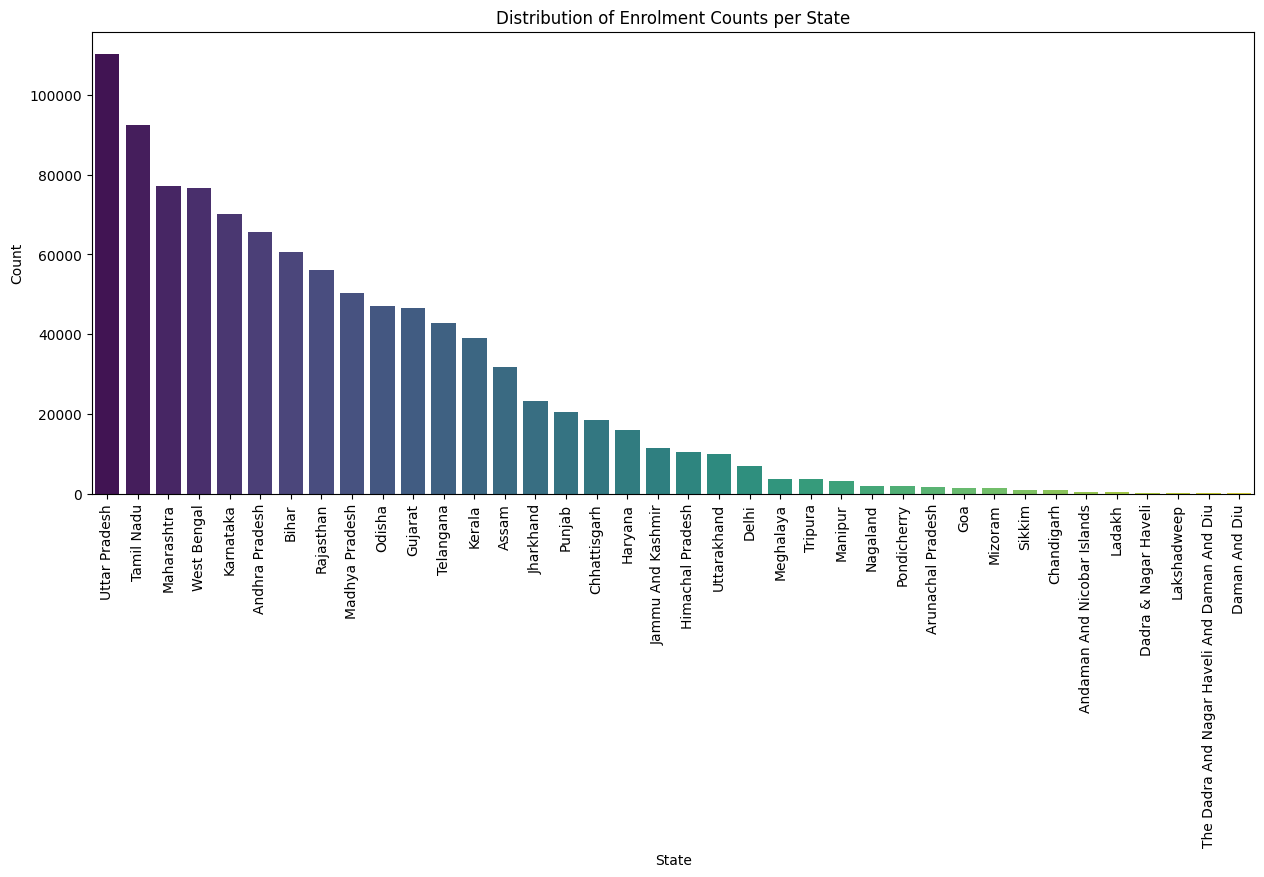

In [53]:
print("Univariate Analysis of Enrolment Data")

# Distribution of states in enrol dataframe
plt.figure(figsize=(15, 6))
sns.countplot(data=enrol, x='state', order=enrol['state'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Enrolment Counts per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


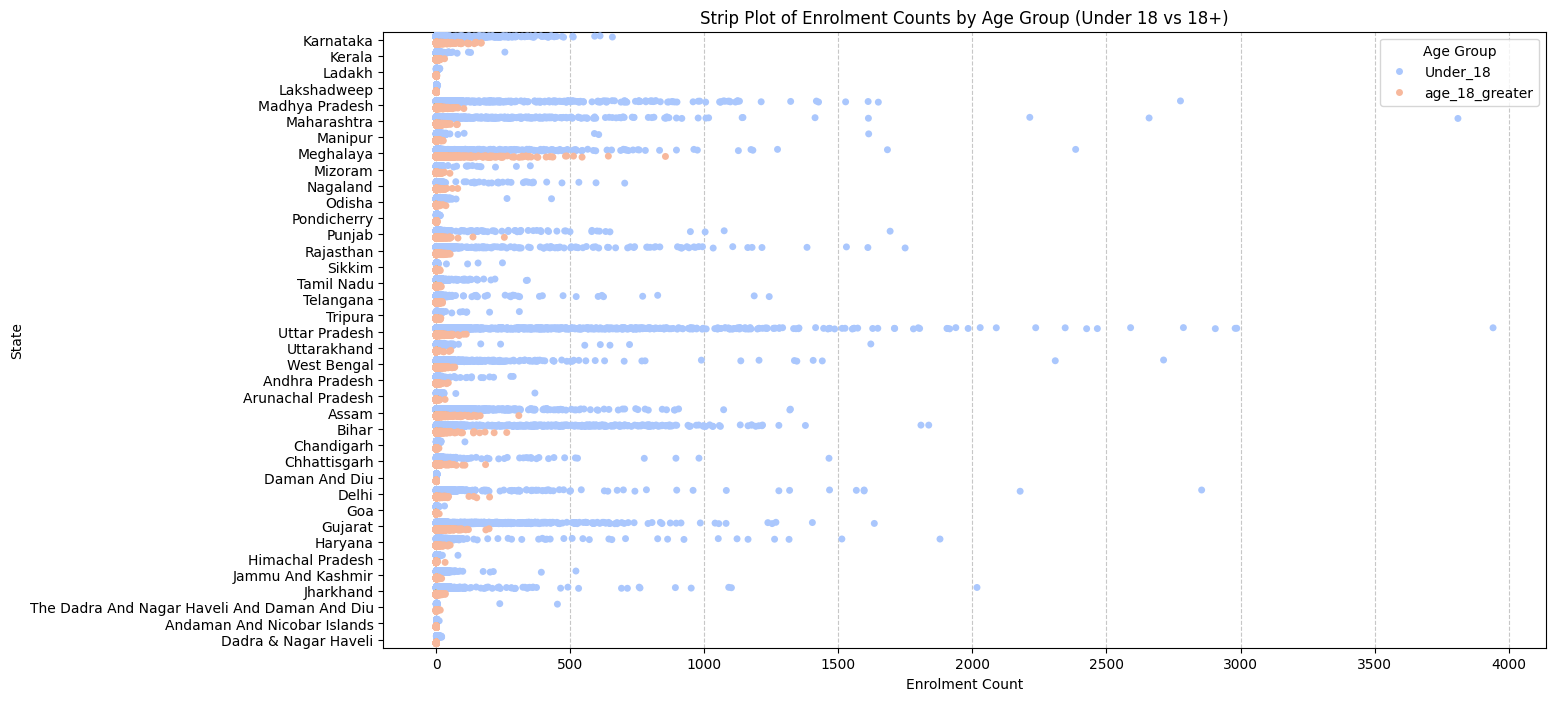

In [54]:
enrol['Under_18'] = enrol['age_0_5'] + enrol['age_5_17']

# Prepare data for plotting by melting the DataFrame
age_groups_data = enrol[['state', 'Under_18', 'age_18_greater']].melt(id_vars='state', var_name='Age_Group', value_name='Enrolment_Count')

plt.figure(figsize=(15, 8))
sns.stripplot(data=age_groups_data, x='Enrolment_Count', y='state', hue='Age_Group', jitter=True, palette='coolwarm', dodge=True)
plt.title('Strip Plot of Enrolment Counts by Age Group (Under 18 vs 18+)')
plt.xlabel('Enrolment Count')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Age Group')
plt.show()

Total Enrolment for Ages Under 5: 3,546,965
Total Enrolment for Ages 5-17: 1,720,383
Total Enrolment for Ages 18 and Above: 168,136


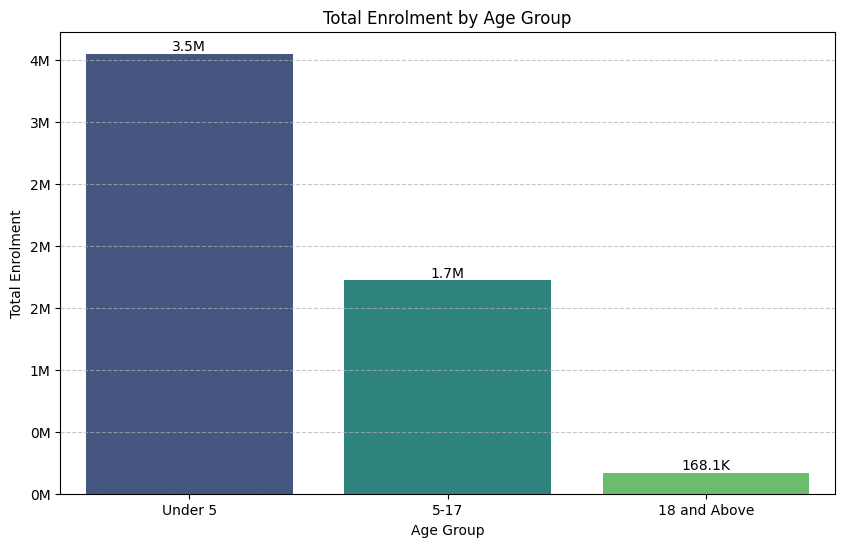

In [55]:
# Calculate total enrolment for each age group
total_age_0_5 = enrol['age_0_5'].sum()
total_age_5_17 = enrol['age_5_17'].sum()
total_age_18_greater = enrol['age_18_greater'].sum()

print(f"Total Enrolment for Ages Under 5: {total_age_0_5:,}")
print(f"Total Enrolment for Ages 5-17: {total_age_5_17:,}")
print(f"Total Enrolment for Ages 18 and Above: {total_age_18_greater:,}")

# Prepare data for plotting
enrolment_totals = pd.DataFrame({
    'Age Group': ['Under 5', '5-17', '18 and Above'],
    'Total Enrolment': [total_age_0_5, total_age_5_17, total_age_18_greater]
})

# Plotting the histogram (bar plot)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=enrolment_totals, x='Age Group', y='Total Enrolment', palette='viridis')
plt.title('Total Enrolment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Enrolment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.show()


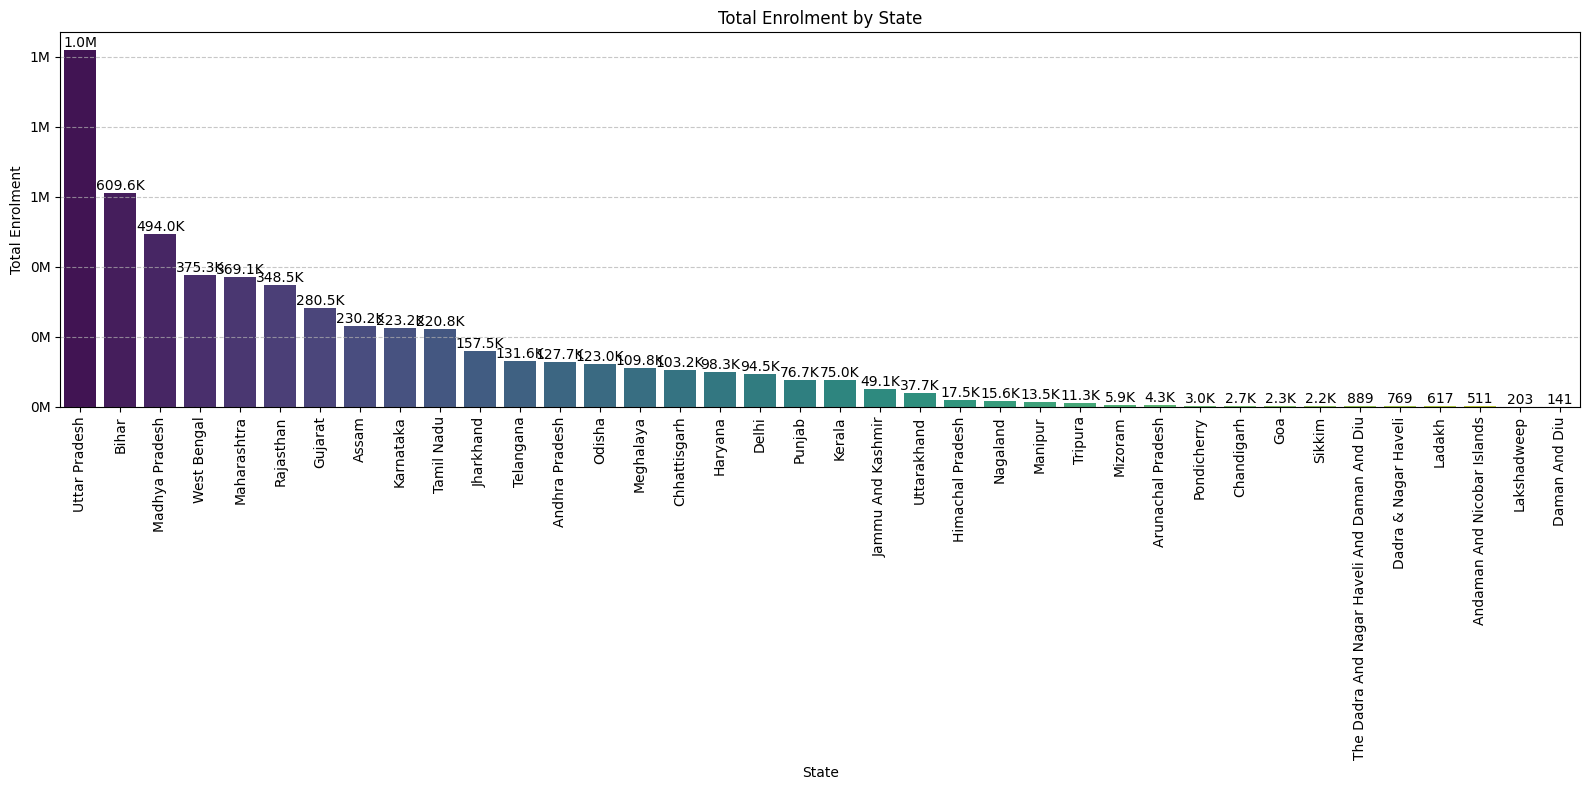

In [58]:
enrol['Total Enrolment'] = enrol['age_0_5'] + enrol['age_5_17'] + enrol['age_18_greater']

# Calculate total enrolment by state
state_enrolment = enrol.groupby('state')['Total Enrolment'].sum().reset_index()

# Sort the states by total enrolment for better visualization
state_enrolment = state_enrolment.sort_values(by='Total Enrolment', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=state_enrolment, x='state', y='Total Enrolment', palette='viridis')
plt.title('Total Enrolment by State')
plt.xlabel('State')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Demographic Data


### Understanding the distribution of State, Age

Univariate Analysis of Demographic Data


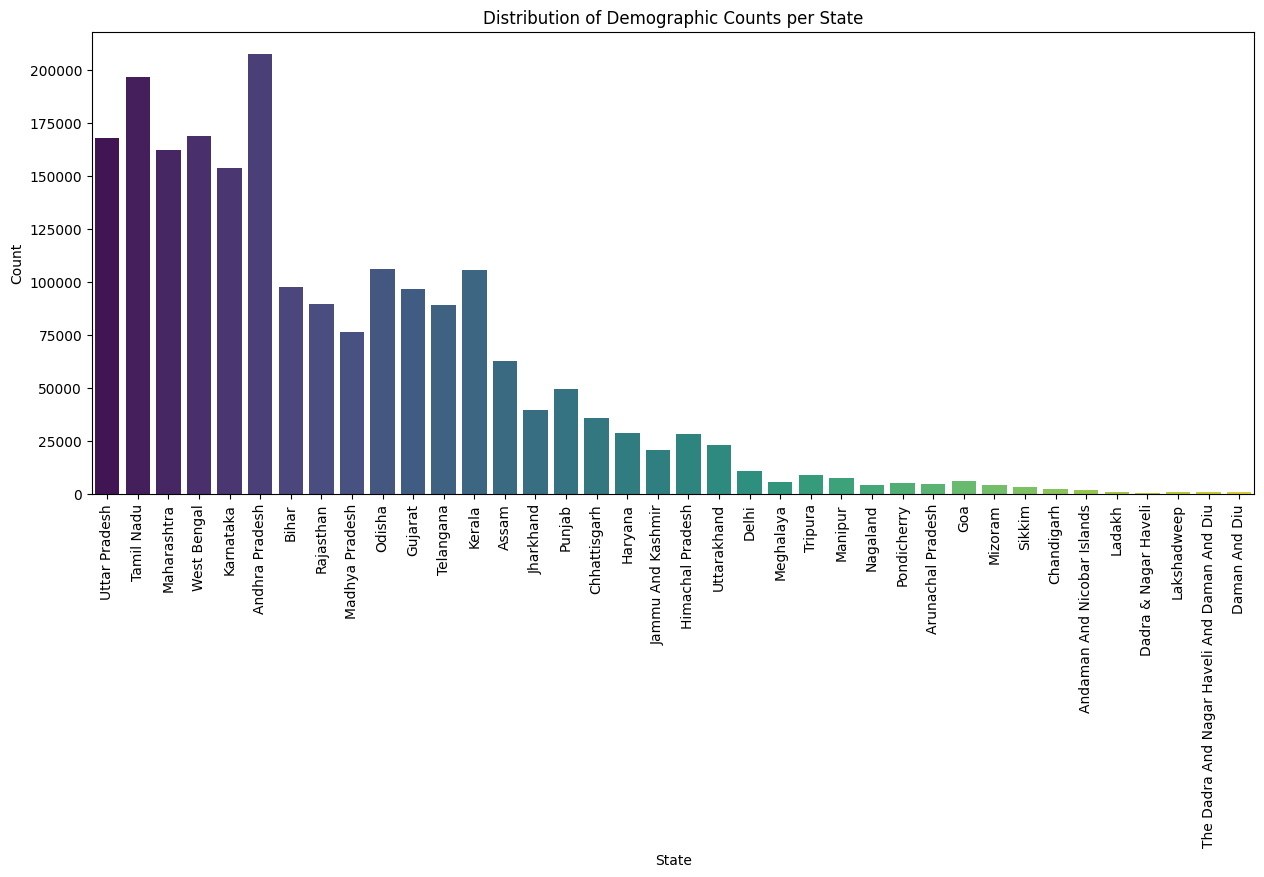

In [59]:
print("Univariate Analysis of Demographic Data")

# Distribution of states in demographic dataframe
plt.figure(figsize=(15, 6))
sns.countplot(data=demographic, x='state', order=enrol['state'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Demographic Counts per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


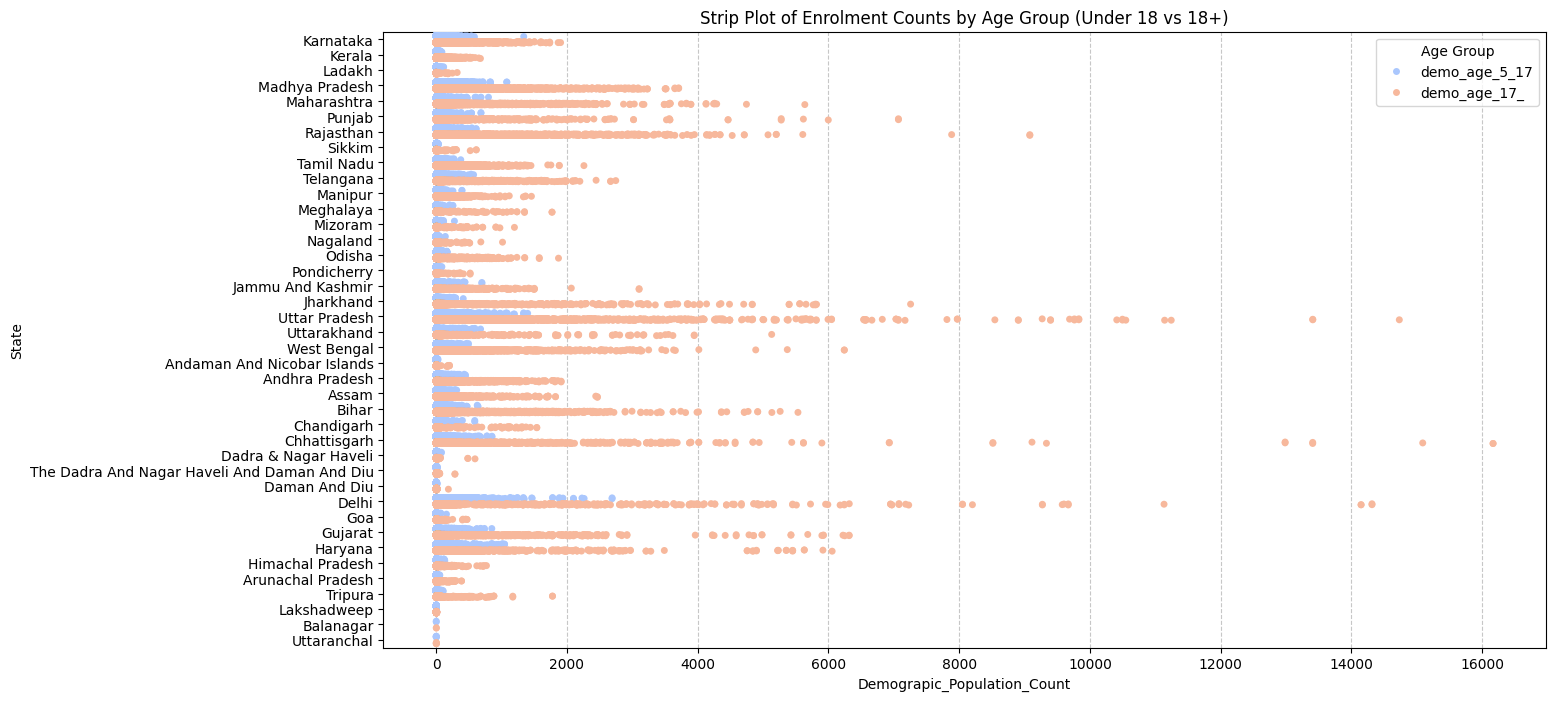

In [60]:
# Prepare data for plotting by melting the DataFrame
age_groups_data = demographic[['state', 'demo_age_5_17', 'demo_age_17_']].melt(id_vars='state', var_name='Age_Group', value_name='Demograpic_Population_Count')

plt.figure(figsize=(15, 8))
sns.stripplot(data=age_groups_data, x='Demograpic_Population_Count', y='state', hue='Age_Group', jitter=True, palette='coolwarm', dodge=True)
plt.title('Strip Plot of Enrolment Counts by Age Group (Under 18 vs 18+)')
plt.xlabel('Demograpic_Population_Count')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Age Group')
plt.show()

Total Demographic Enrolment for Ages 5-17: 4,863,424
Total Demographic Enrolment for Ages 17 and Above: 44,431,761


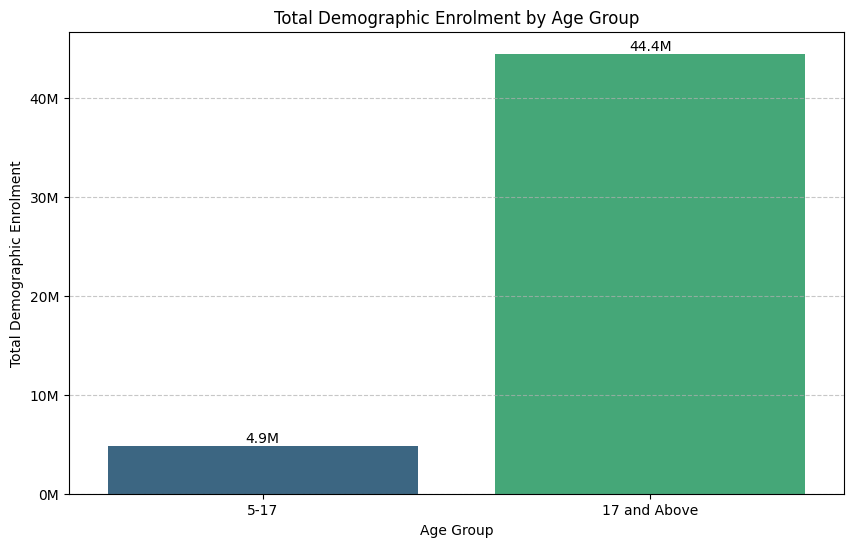

In [61]:
# Calculate total demographic enrolment for each age group
total_demo_age_5_17 = demographic['demo_age_5_17'].sum()
total_demo_age_17_ = demographic['demo_age_17_'].sum()

print(f"Total Demographic Enrolment for Ages 5-17: {total_demo_age_5_17:,}")
print(f"Total Demographic Enrolment for Ages 17 and Above: {total_demo_age_17_:,}")

# Prepare data for plotting
demographic_totals = pd.DataFrame({
    'Age Group': ['5-17', '17 and Above'],
    'Total Demographic Enrolment': [total_demo_age_5_17, total_demo_age_17_]
})

# Plotting the histogram (bar plot)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=demographic_totals, x='Age Group', y='Total Demographic Enrolment', palette='viridis')
plt.title('Total Demographic Enrolment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Demographic Enrolment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.show()

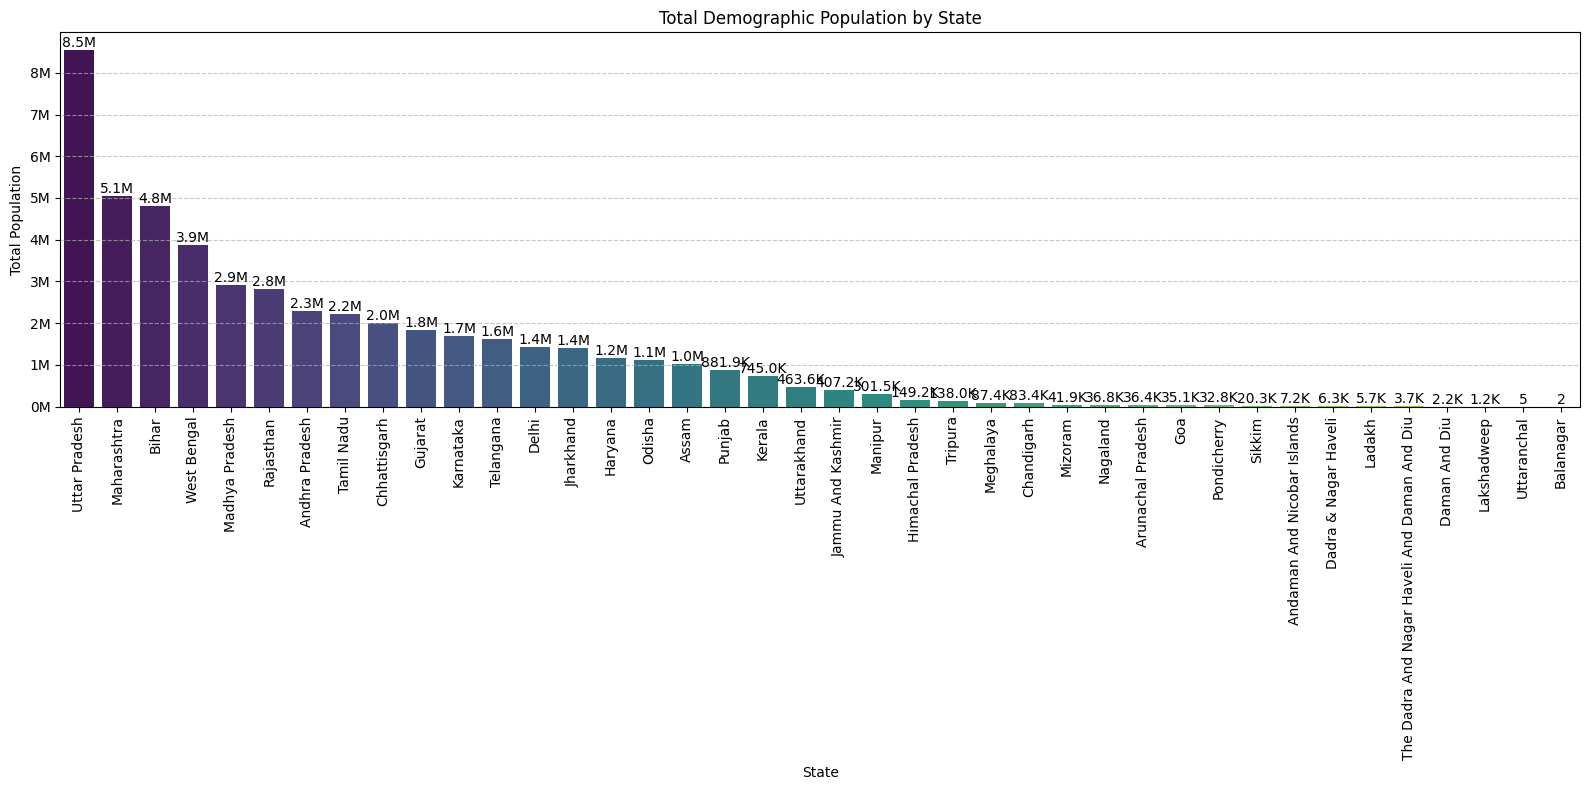

In [63]:
demographic['Total_Population_AgeGroup'] = demographic['demo_age_5_17'] + demographic['demo_age_17_']

# Calculate total demographic population by state
state_demographic = demographic.groupby('state')['Total_Population_AgeGroup'].sum().reset_index()

# Sort the states by total population for better visualization
state_demographic = state_demographic.sort_values(by='Total_Population_AgeGroup', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=state_demographic, x='state', y='Total_Population_AgeGroup', palette='viridis')
plt.title('Total Demographic Population by State')
plt.xlabel('State')
plt.ylabel('Total Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Biometric Data


### Understanding the distribution of State, Age

Univariate Analysis of Biometric Data


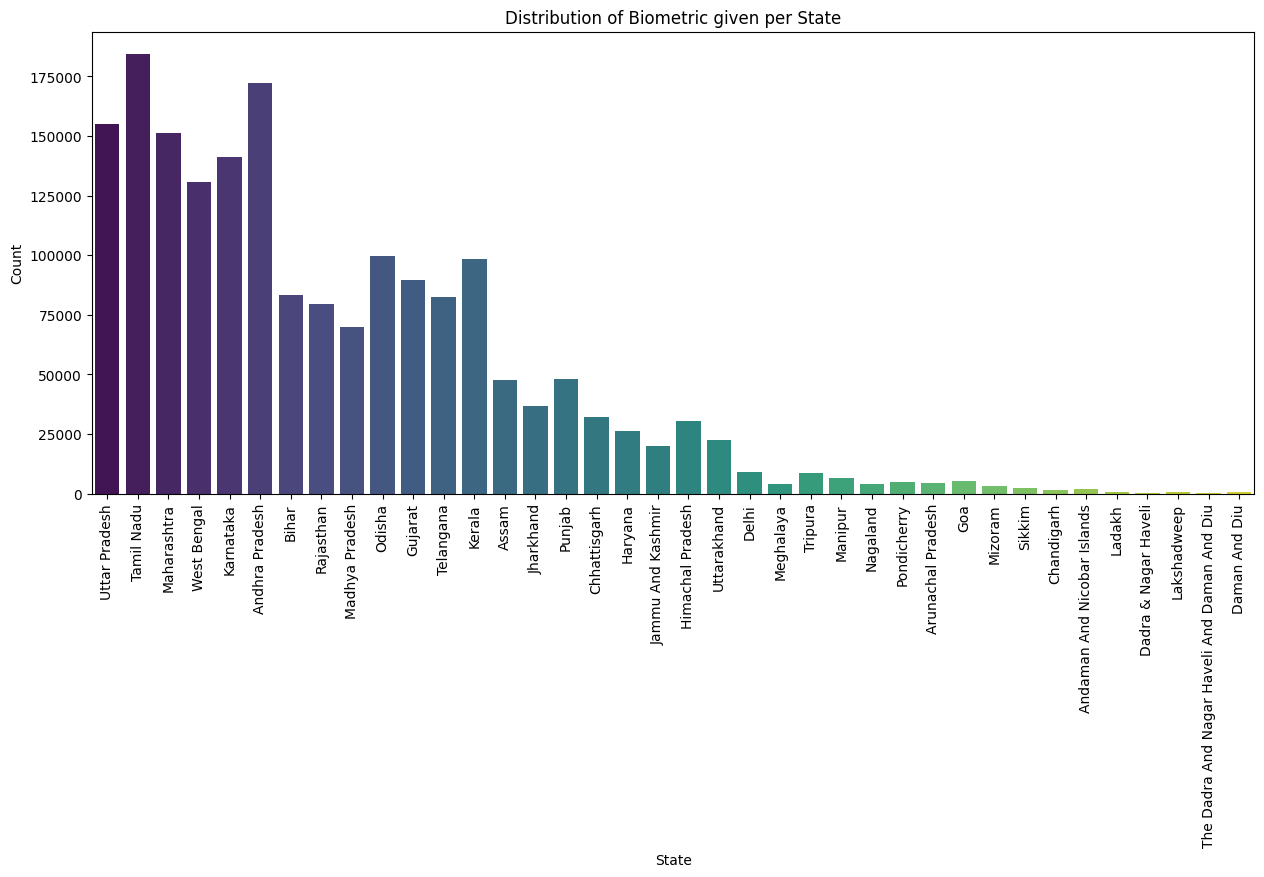

In [64]:
print("Univariate Analysis of Biometric Data")

# Distribution of states in Biometric dataframe
plt.figure(figsize=(15, 6))
sns.countplot(data=bio, x='state', order=enrol['state'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Biometric given per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


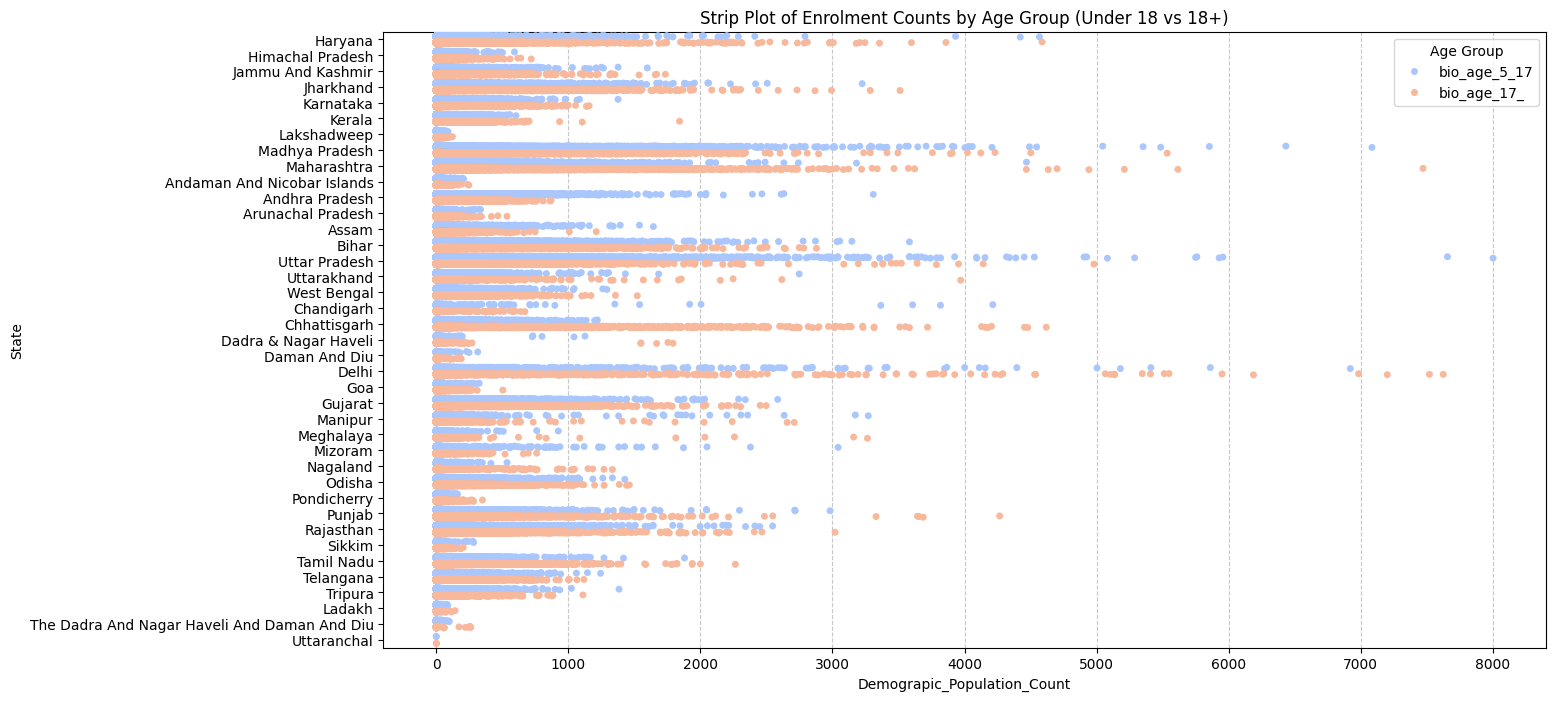

In [65]:
# Prepare data for plotting by melting the DataFrame
age_groups_data = bio[['state', 'bio_age_5_17', 'bio_age_17_']].melt(id_vars='state', var_name='Age_Group', value_name='BiometricGiven_Population_Count')

plt.figure(figsize=(15, 8))
sns.stripplot(data=age_groups_data, x='BiometricGiven_Population_Count', y='state', hue='Age_Group', jitter=True, palette='coolwarm', dodge=True)
plt.title('Strip Plot of Enrolment Counts by Age Group (Under 18 vs 18+)')
plt.xlabel('Demograpic_Population_Count')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Age Group')
plt.show()

Total Biometric Given for Ages 5-17: 34,226,855
Total Biometric Given for Ages 17 and Above: 35,536,240


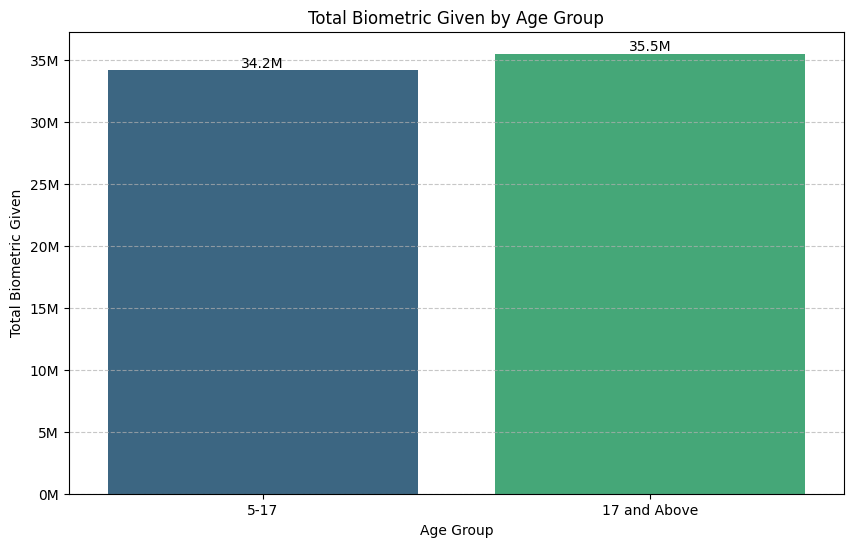

In [66]:
# Calculate total biometric given for each age group
total_bio_age_5_17 = bio['bio_age_5_17'].sum()
total_bio_age_17_ = bio['bio_age_17_'].sum()

print(f"Total Biometric Given for Ages 5-17: {total_bio_age_5_17:,}")
print(f"Total Biometric Given for Ages 17 and Above: {total_bio_age_17_:,}")

# Prepare data for plotting
biometric_totals = pd.DataFrame({
    'Age Group': ['5-17', '17 and Above'],
    'Total Biometric Given': [total_bio_age_5_17, total_bio_age_17_]
})

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=biometric_totals, x='Age Group', y='Total Biometric Given', palette='viridis')
plt.title('Total Biometric Given by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Biometric Given')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.show()

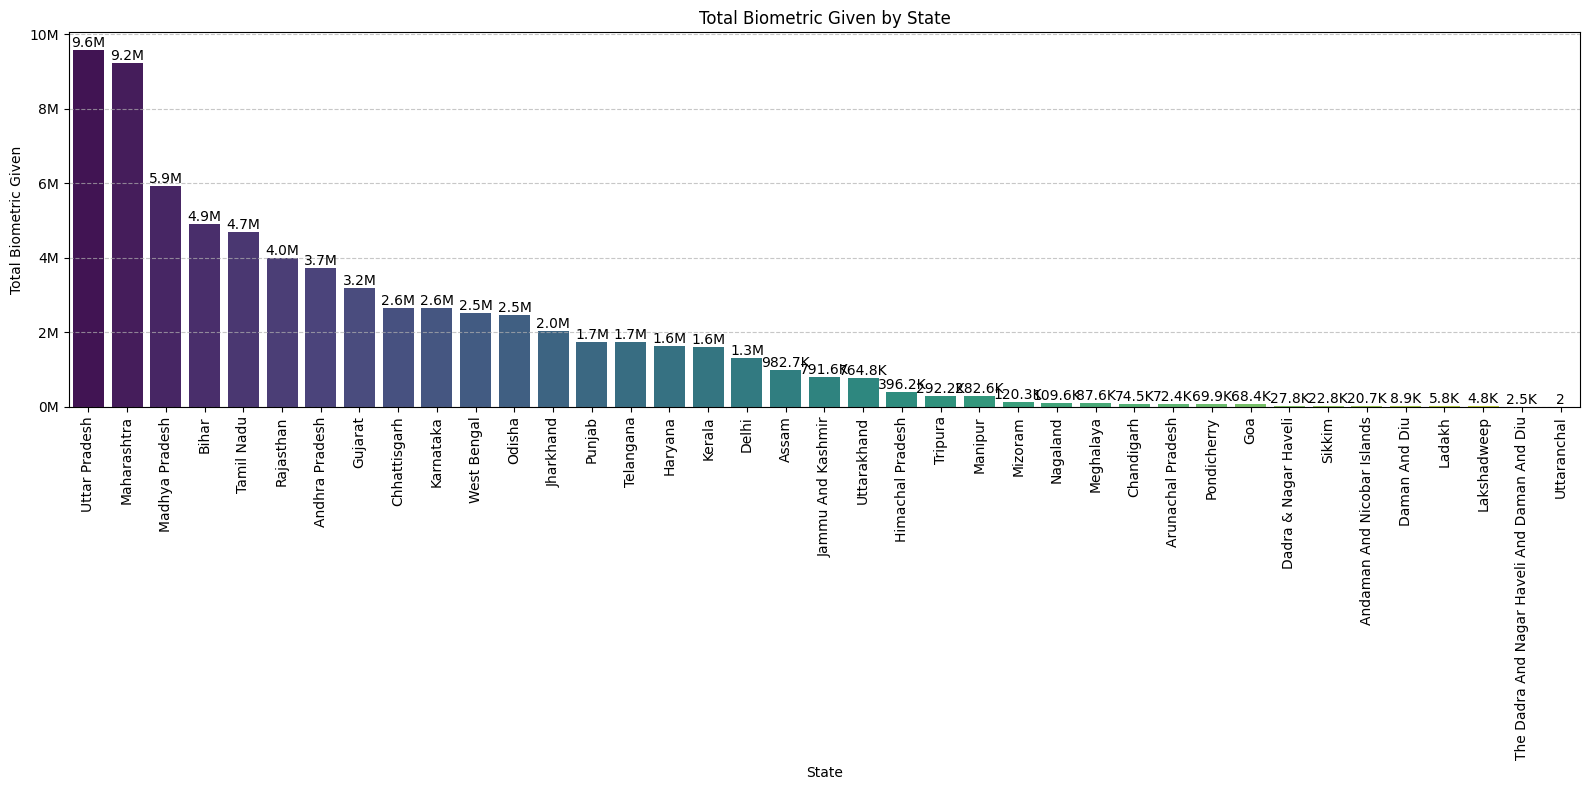

In [68]:
# Calculate total biometric given by state
bio['Total_Biometric_Given_AgeGroup'] = bio['bio_age_5_17'] + bio['bio_age_17_']
state_biometric = bio.groupby('state')['Total_Biometric_Given_AgeGroup'].sum().reset_index()

# Sort the states by total biometric given for better visualization
state_biometric = state_biometric.sort_values(by='Total_Biometric_Given_AgeGroup', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=state_biometric, x='state', y='Total_Biometric_Given_AgeGroup', palette='viridis')
plt.title('Total Biometric Given by State')
plt.xlabel('State')
plt.ylabel('Total Biometric Given')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# BI-VARIATE ANALYSIS

## Understanding of the different variables

### Enrollment Data

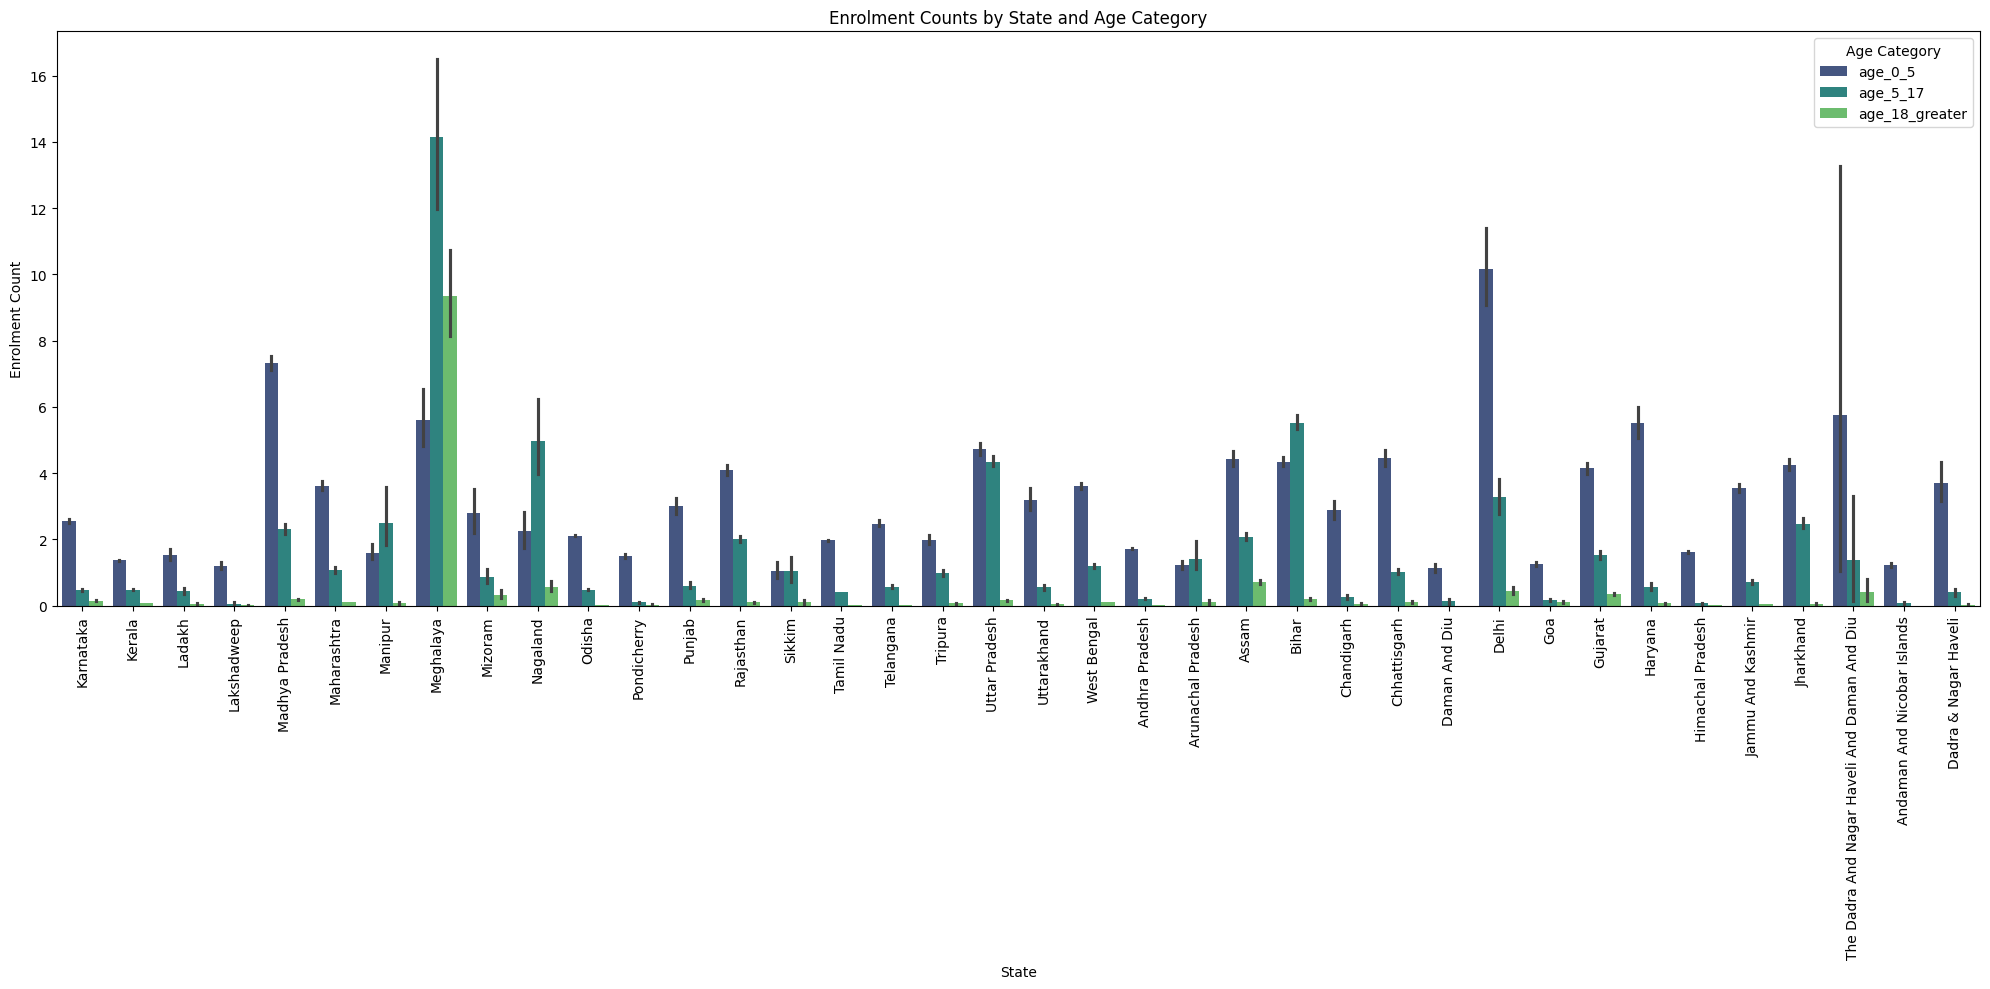

In [69]:
# Prepare data for grouped bar chart: state vs age groups
age_groups_melted = enrol.melt(id_vars=['state'],
                               value_vars=['age_0_5', 'age_5_17', 'age_18_greater'],
                               var_name='Age_Category',
                               value_name='Enrolment_Count')

plt.figure(figsize=(20, 10))
sns.barplot(data=age_groups_melted, x='state', y='Enrolment_Count', hue='Age_Category', palette='viridis')
plt.title('Enrolment Counts by State and Age Category')
plt.xlabel('State')
plt.ylabel('Enrolment Count')
plt.xticks(rotation=90)
plt.legend(title='Age Category')
plt.tight_layout()
plt.show()

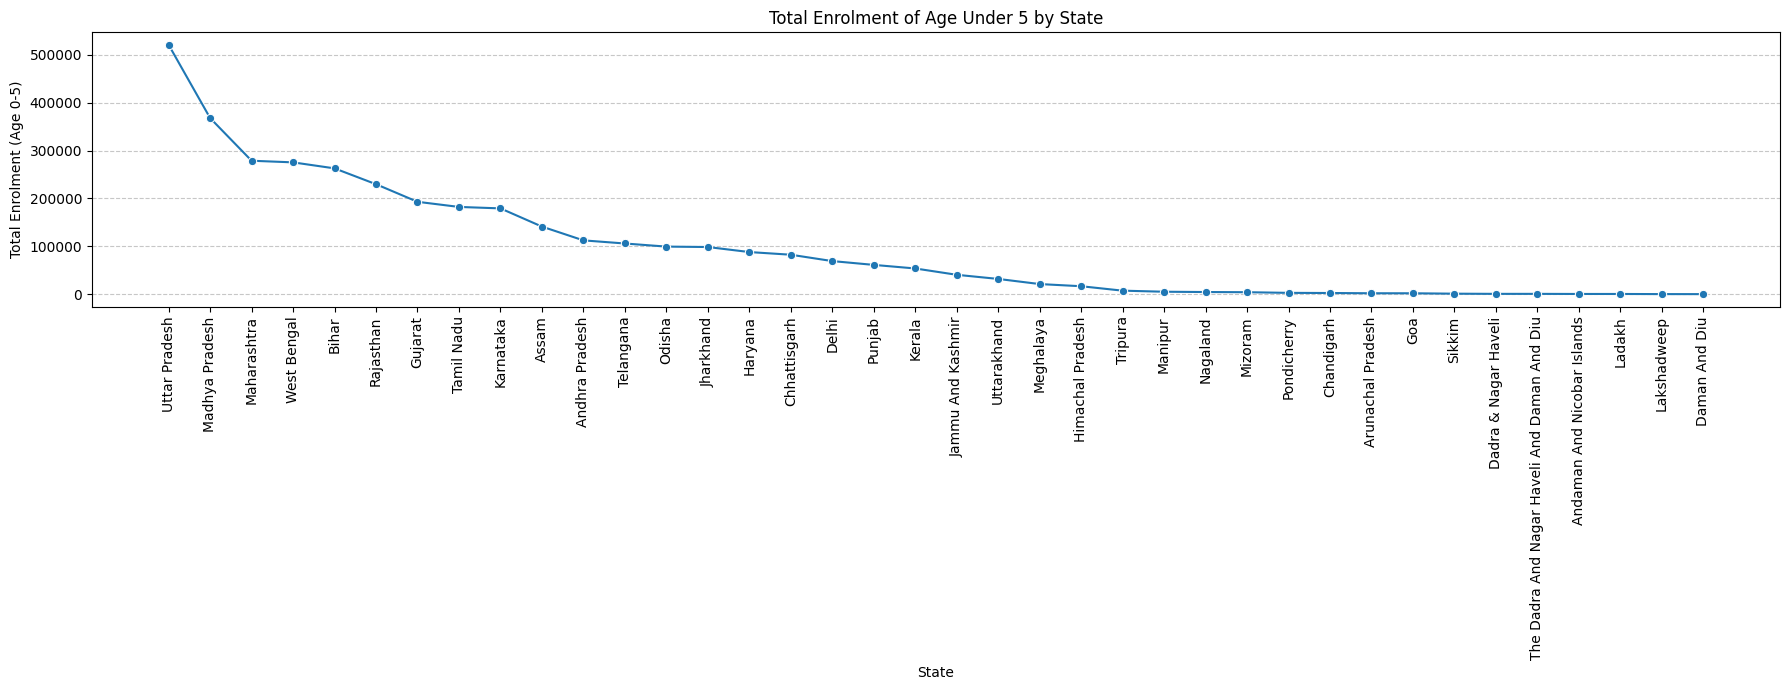

In [70]:
# Calculate total enrolment of 'age_0_5' by state
state_age_0_5_enrolment = enrol.groupby('state')['age_0_5'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_0_5_enrolment = state_age_0_5_enrolment.sort_values(by='age_0_5', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_0_5_enrolment, x='state', y='age_0_5', marker='o', palette='viridis')
plt.title('Total Enrolment of Age Under 5 by State')
plt.xlabel('State')
plt.ylabel('Total Enrolment (Age 0-5)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

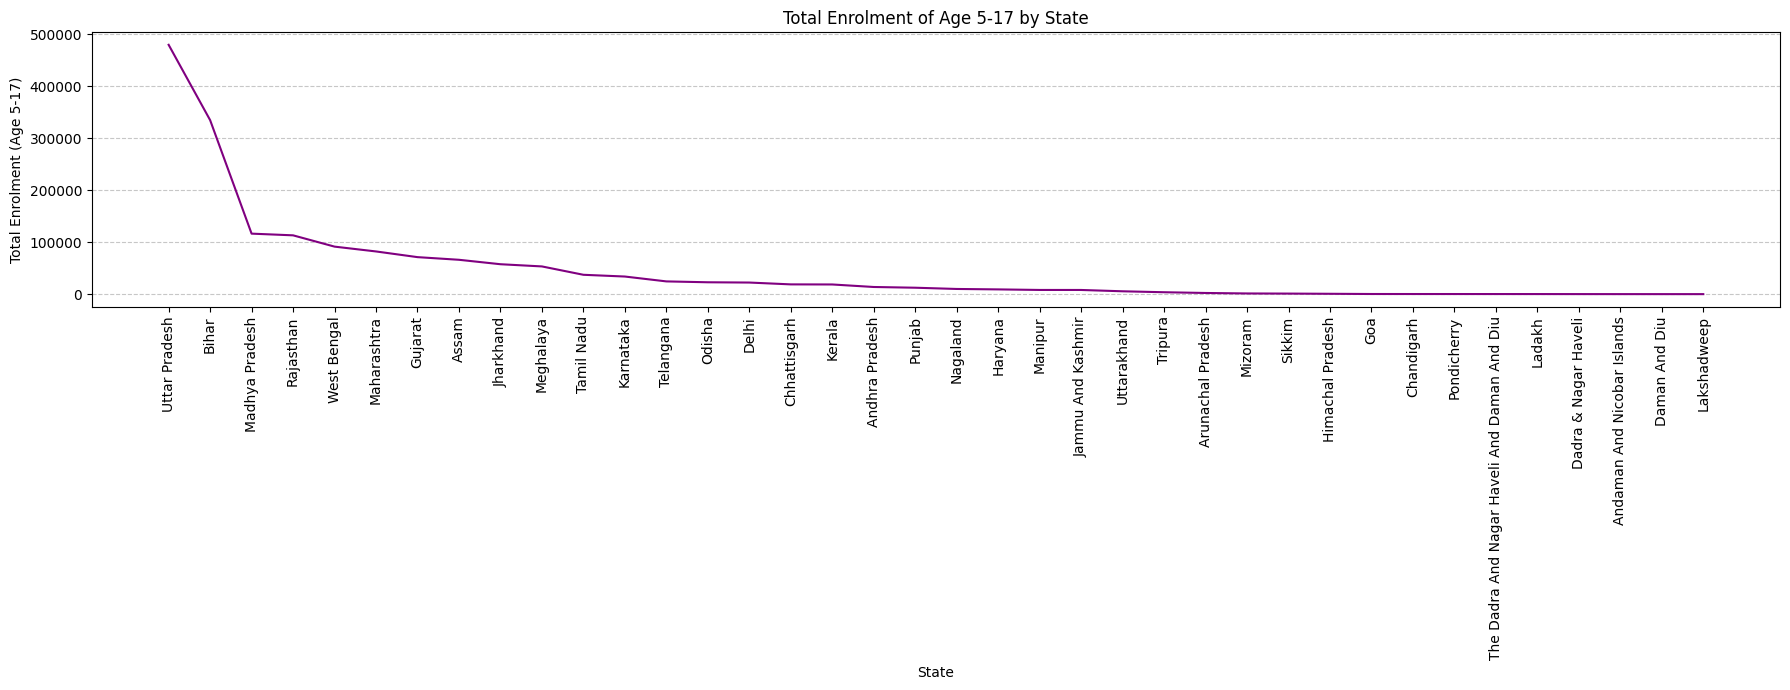

In [71]:
# Calculate total enrolment of 'age_5_17' by state
state_age_5_17_enrolment = enrol.groupby('state')['age_5_17'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_5_17_enrolment = state_age_5_17_enrolment.sort_values(by='age_5_17', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_5_17_enrolment, x='state', y='age_5_17', color = 'purple',ci = None)
plt.title('Total Enrolment of Age 5-17 by State')
plt.xlabel('State')
plt.ylabel('Total Enrolment (Age 5-17)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

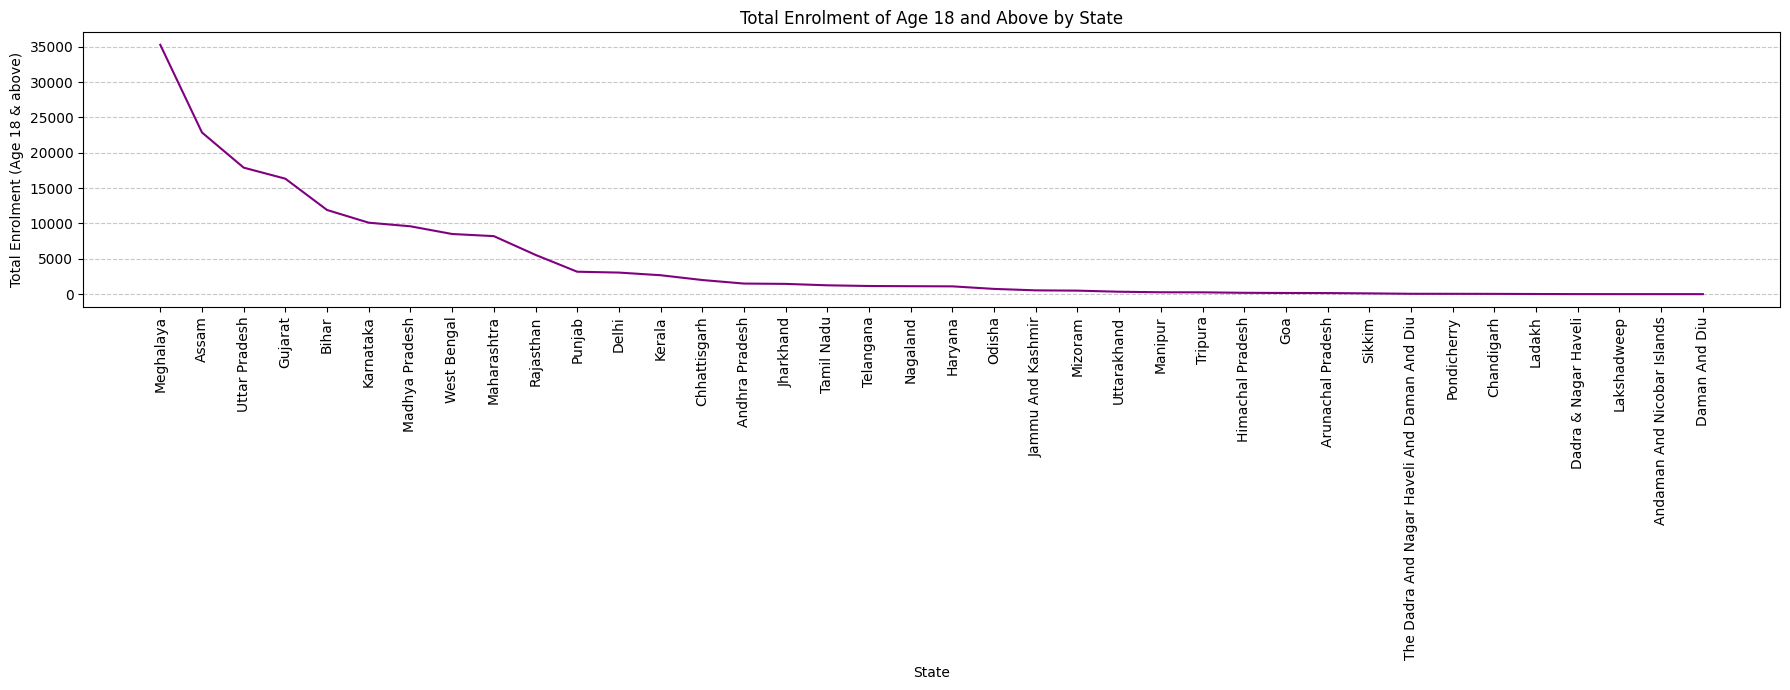

In [72]:
# Calculate total enrolment of 'age_17_above' by state
state_age_above18_enrolment = enrol.groupby('state')['age_18_greater'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_above18_enrolment = state_age_above18_enrolment.sort_values(by='age_18_greater', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_above18_enrolment, x='state', y='age_18_greater', color = 'purple',ci = None)
plt.title('Total Enrolment of Age 18 and Above by State')
plt.xlabel('State')
plt.ylabel('Total Enrolment (Age 18 & above)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

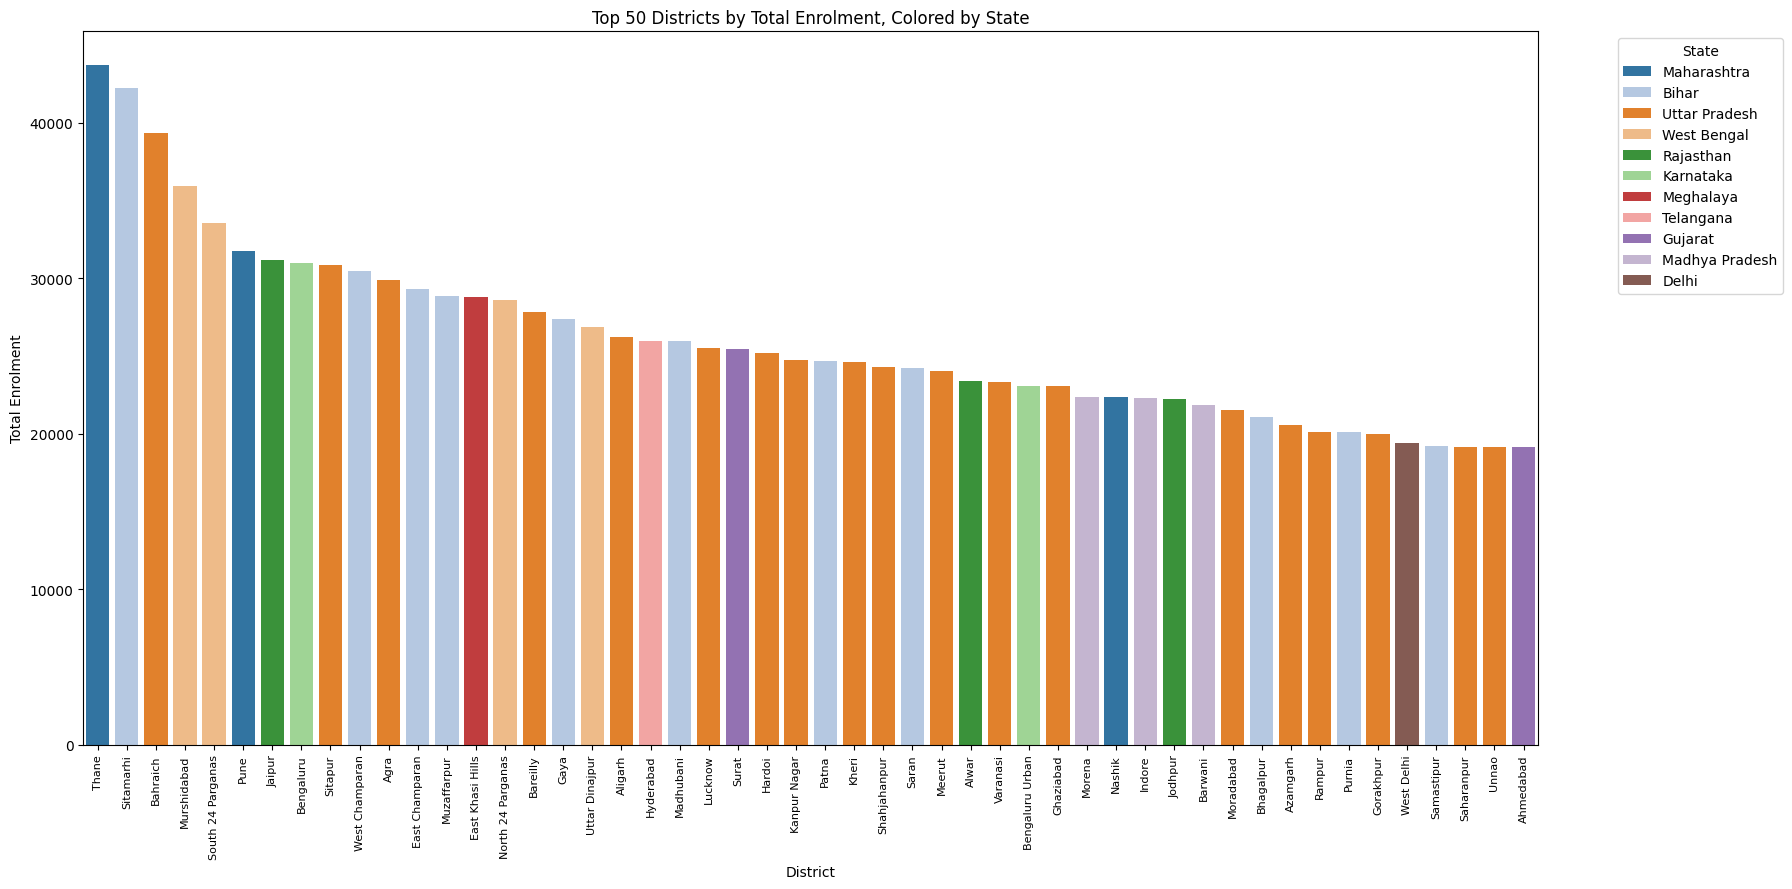

In [74]:
# Calculate total enrolment per district, keeping state information
enrol['Total_Enrolment'] = enrol['age_0_5'] + enrol['age_5_17'] + enrol['age_18_greater']
district_state_enrolment = enrol.groupby(['state', 'district'])['Total_Enrolment'].sum().reset_index()

# Sort by Total_Enrolment in descending order to show top districts
district_state_enrolment_sorted = district_state_enrolment.sort_values(by='Total_Enrolment', ascending=False)

# Select top N districts for visualization to avoid clutter
top_n = 50 # Adjust N as needed
top_districts = district_state_enrolment_sorted.head(top_n)

plt.figure(figsize=(18, 9))
sns.barplot(data=top_districts, x='district', y='Total_Enrolment', hue='state', dodge=False, palette='tab20')
plt.title(f'Top {top_n} Districts by Total Enrolment, Colored by State')
plt.xlabel('District')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Demographic Data

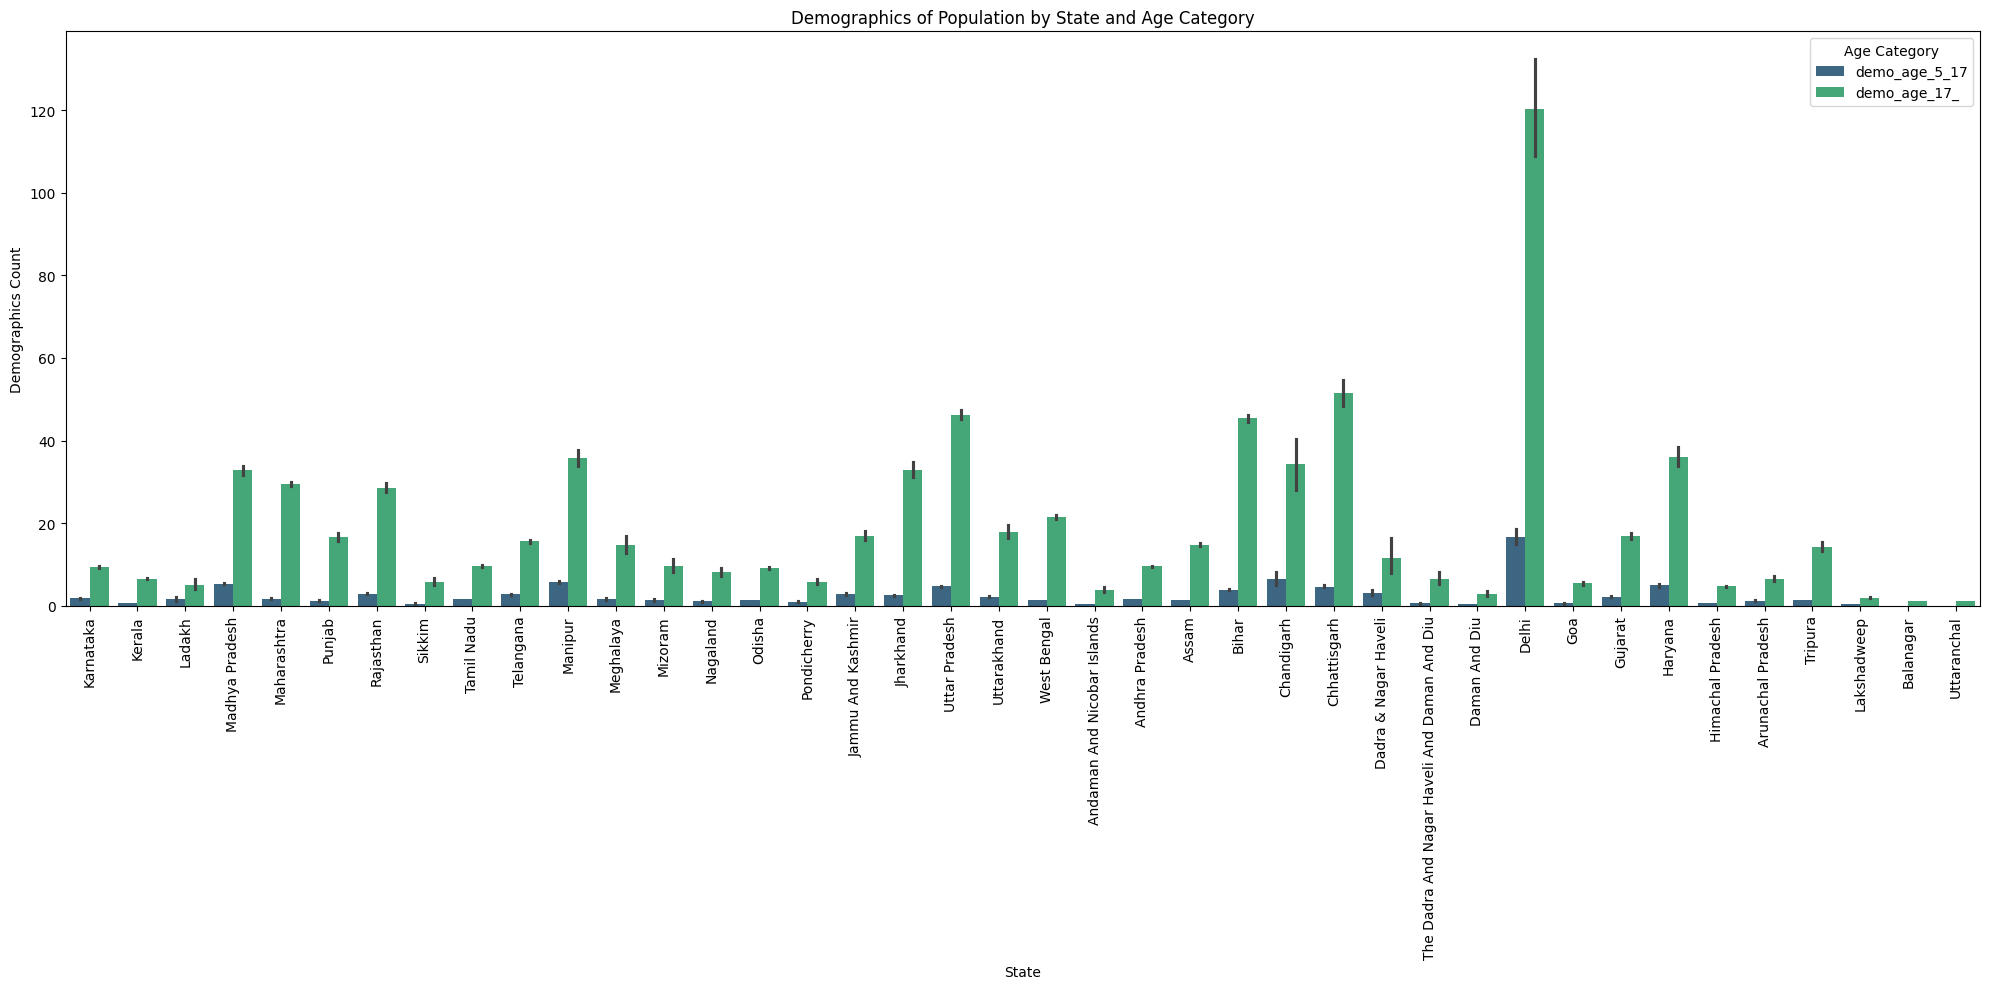

In [75]:
# Prepare data for grouped bar chart: state vs age groups
age_groups_melted = demographic.melt(id_vars=['state'],
                               value_vars=['demo_age_5_17', 'demo_age_17_'],
                               var_name='Age_Category',
                               value_name='Demographic_Count')

plt.figure(figsize=(20, 10))
sns.barplot(data=age_groups_melted, x='state', y='Demographic_Count', hue='Age_Category', palette='viridis')
plt.title('Demographics of Population by State and Age Category')
plt.xlabel('State')
plt.ylabel('Demographics Count')
plt.xticks(rotation=90)
plt.legend(title='Age Category')
plt.tight_layout()
plt.show()

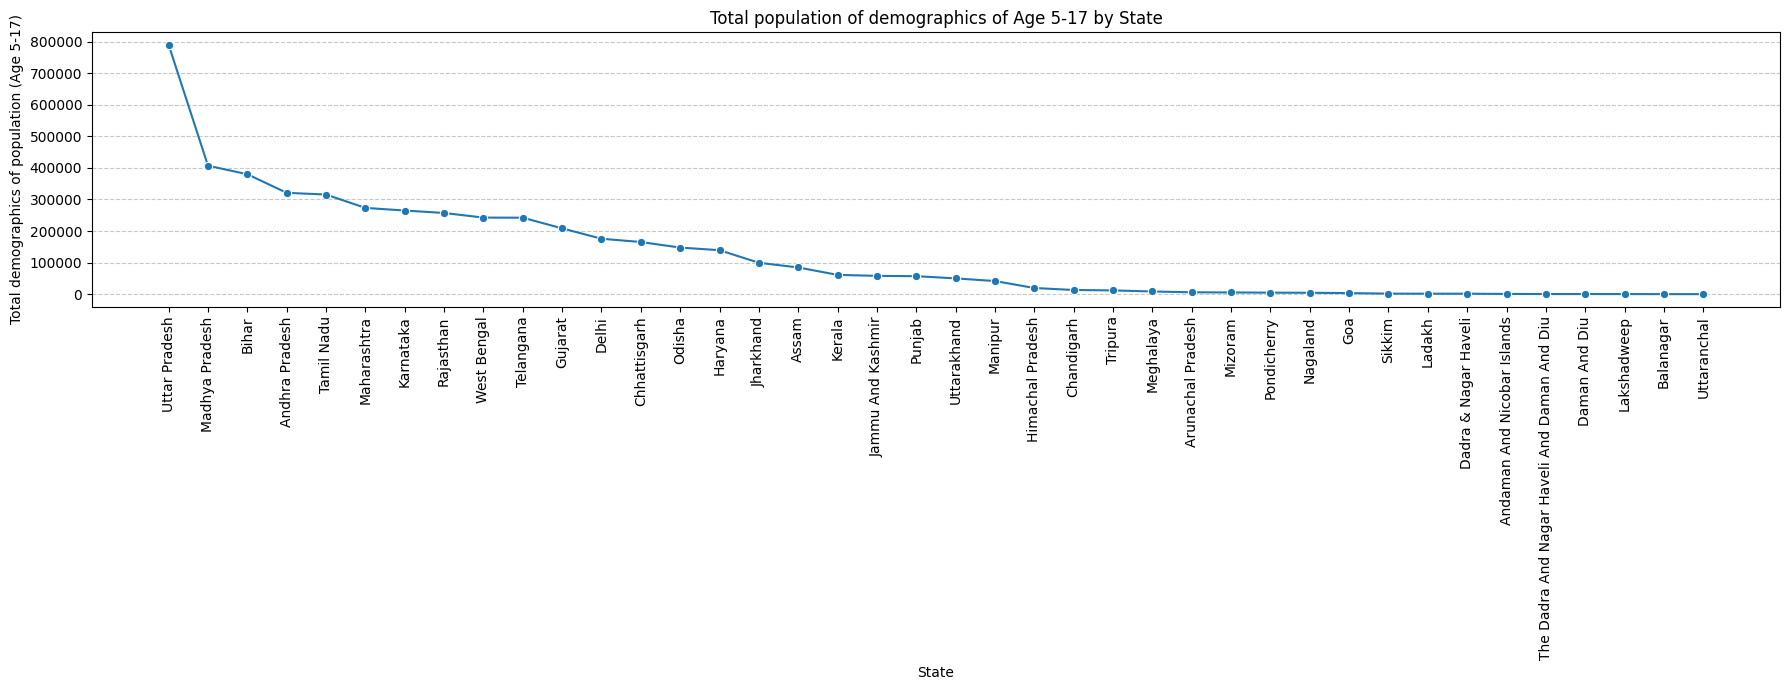

In [76]:
# Calculate total demograhic of 'age_5_17' by state
state_age_5_17_Population_demographic = demographic.groupby('state')['demo_age_5_17'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_5_17_Population_demographic = state_age_5_17_Population_demographic.sort_values(by='demo_age_5_17', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_5_17_Population_demographic, x='state', y='demo_age_5_17', marker='o', palette='viridis')
plt.title('Total population of demographics of Age 5-17 by State')
plt.xlabel('State')
plt.ylabel('Total demographics of population (Age 5-17)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

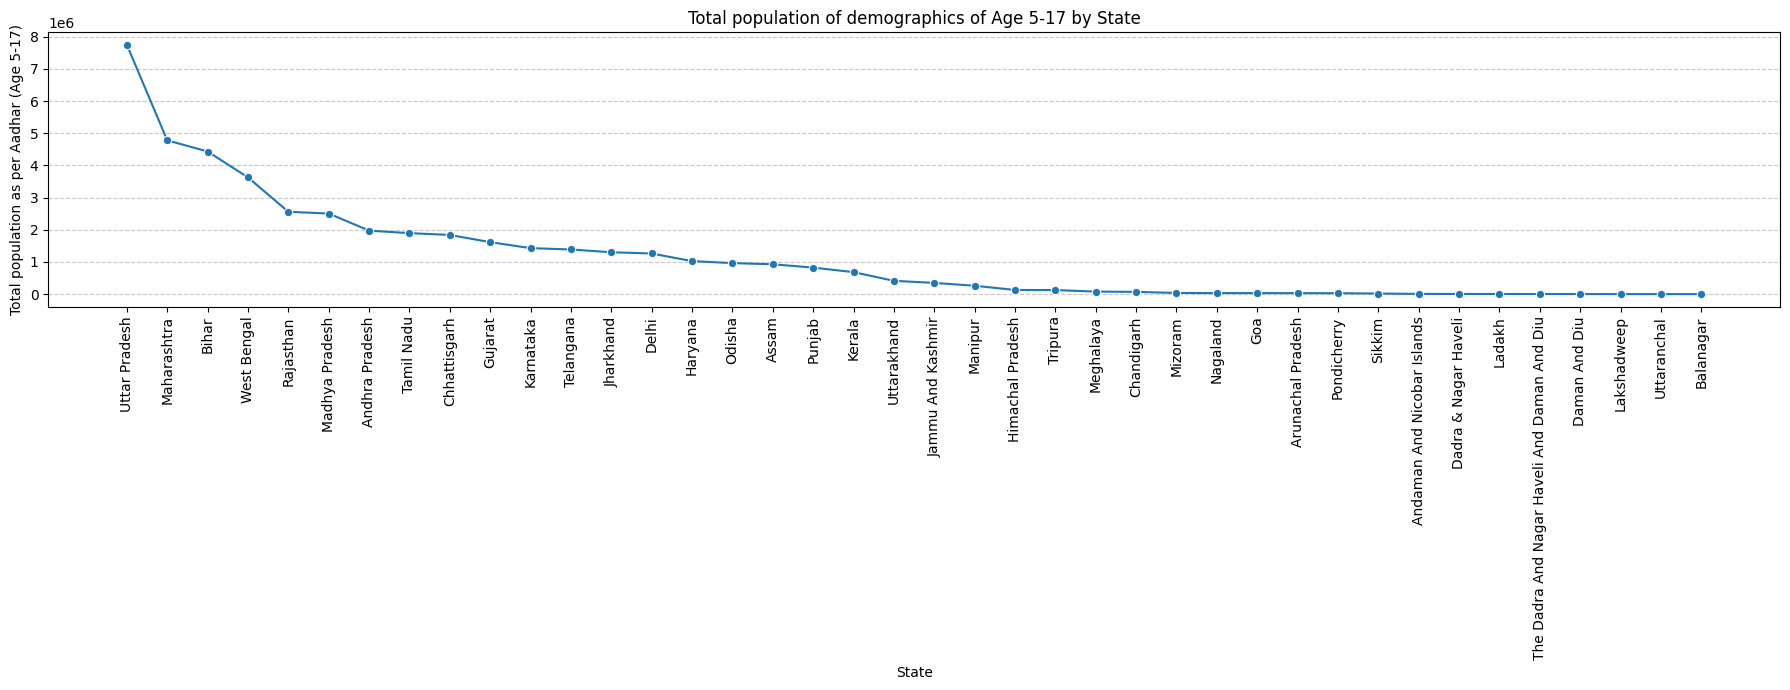

In [77]:
# Calculate total enrolment of 'age_17 and above' by state
state_age_17_Above_Population_demographic = demographic.groupby('state')['demo_age_17_'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_17_Above_Population_demographic = state_age_17_Above_Population_demographic.sort_values(by='demo_age_17_', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_17_Above_Population_demographic, x='state', y='demo_age_17_', marker='o', palette='viridis')
plt.title('Total population of demographics of Age 5-17 by State')
plt.xlabel('State')
plt.ylabel('Total population as per Aadhar (Age 5-17)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

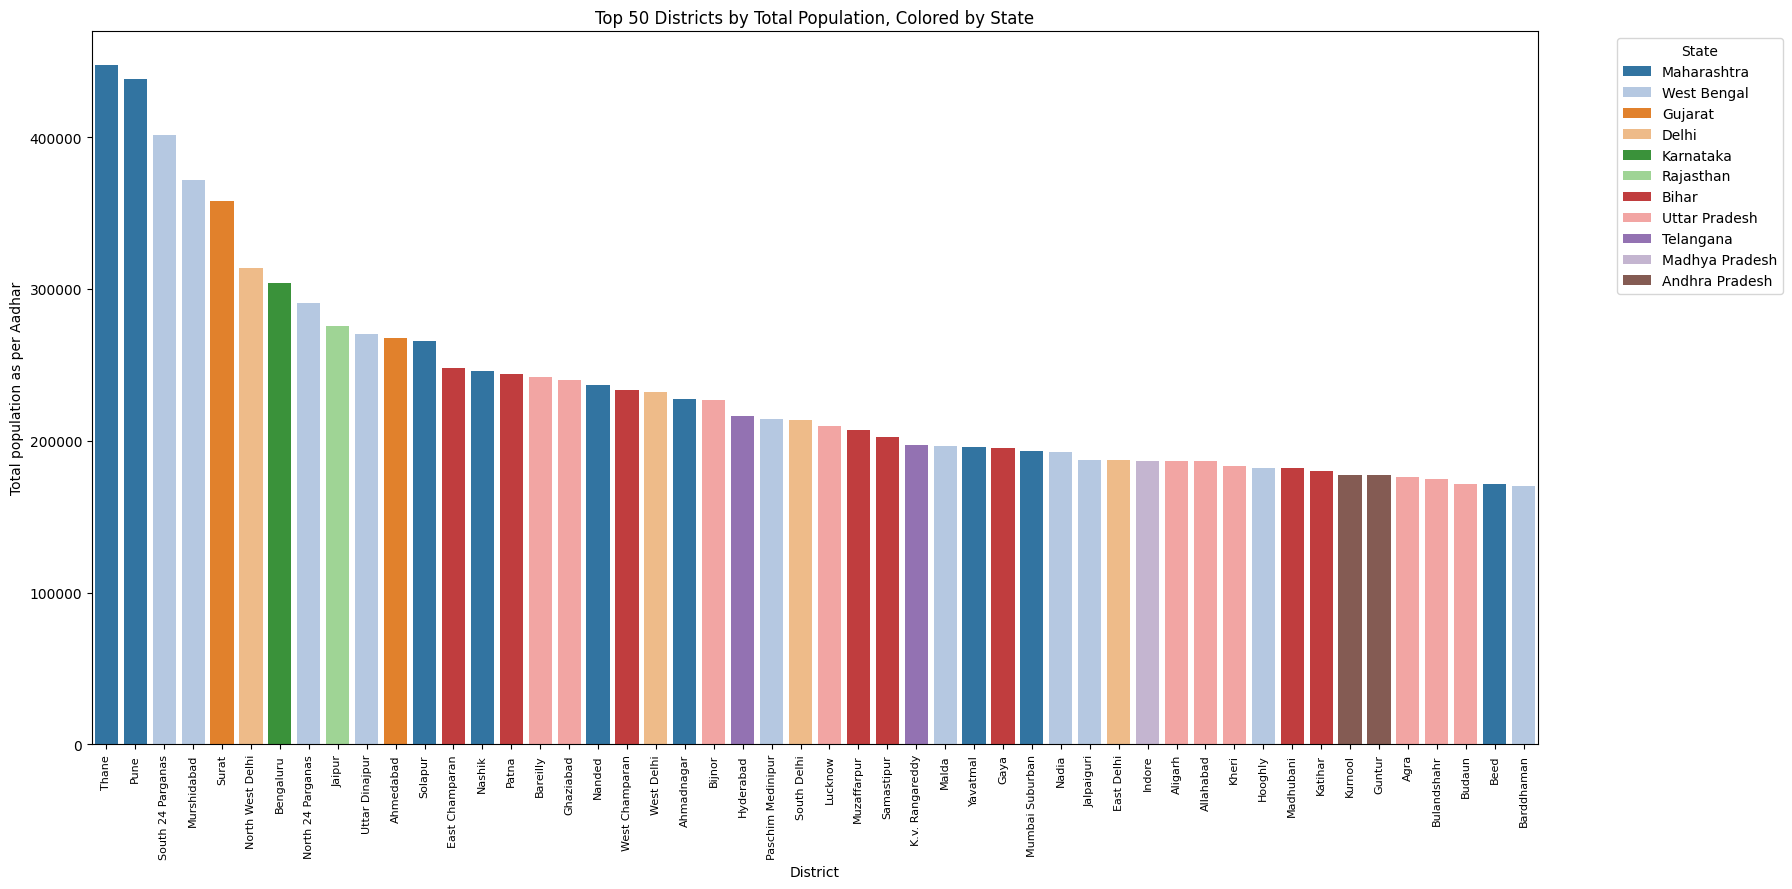

In [78]:
# Calculate total enrolments demographically per district, keeping state information
demographic['Total_Population_AgeGroup'] = demographic['demo_age_5_17'] + demographic['demo_age_17_']
district_state_demographics_data = demographic.groupby(['state', 'district'])['Total_Population_AgeGroup'].sum().reset_index()

# Sort by Total_Population_demographics in descending order to show top districts
district_state_demographics_sorted = district_state_demographics_data.sort_values(by='Total_Population_AgeGroup', ascending=False)

# Select top N districts for visualization to avoid clutter
top_n = 50 # Adjust N as needed
top_districts = district_state_demographics_sorted.head(top_n)

plt.figure(figsize=(18, 9))
sns.barplot(data=top_districts, x='district', y='Total_Population_AgeGroup', hue='state', dodge=False, palette='tab20')
plt.title(f'Top {top_n} Districts by Total Population, Colored by State')
plt.xlabel('District')
plt.ylabel('Total population as per Aadhar')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Biometric Data

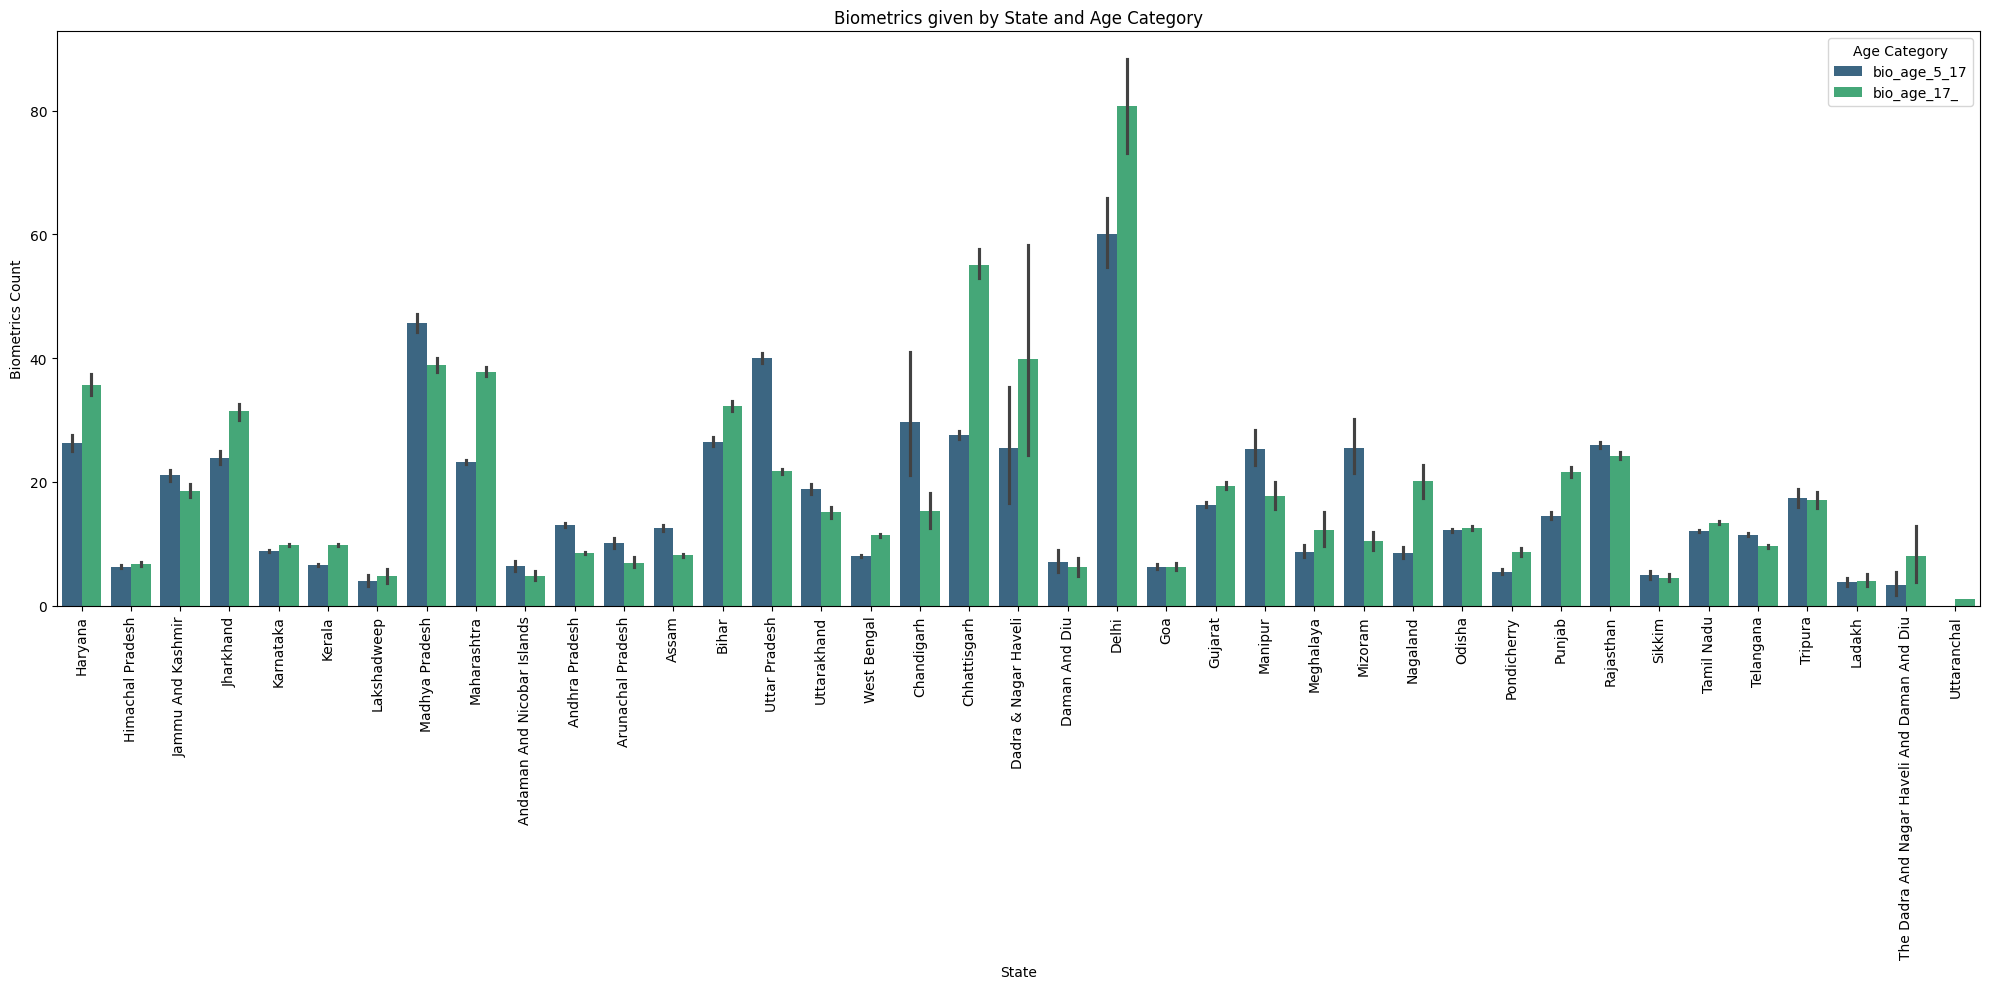

In [79]:
# Prepare data for grouped bar chart: state vs age groups
age_groups_melted = bio.melt(id_vars=['state'],
                               value_vars=['bio_age_5_17', 'bio_age_17_'],
                               var_name='Age_Category',
                               value_name='biometric_Count')

plt.figure(figsize=(20, 10))
sns.barplot(data=age_groups_melted, x='state', y='biometric_Count', hue='Age_Category', palette='viridis')
plt.title('Biometrics given by State and Age Category')
plt.xlabel('State')
plt.ylabel('Biometrics Count')
plt.xticks(rotation=90)
plt.legend(title='Age Category')
plt.tight_layout()
plt.show()

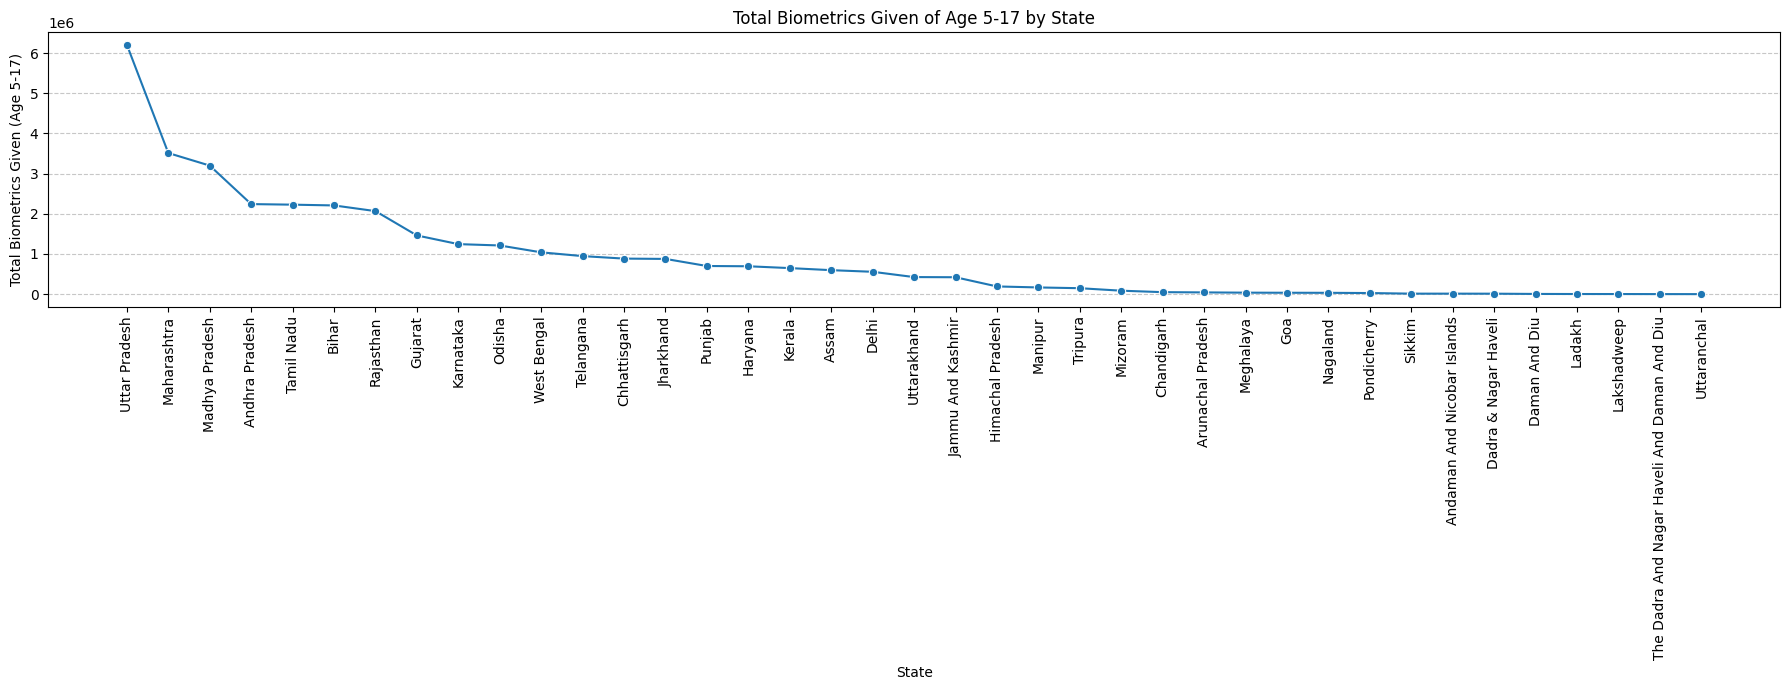

In [80]:
# Calculate total biometrics given of 'age_5_17' by state
state_age_5_17_biometrics_given = bio.groupby('state')['bio_age_5_17'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_5_17_biometrics_given_sorted = state_age_5_17_biometrics_given.sort_values(by='bio_age_5_17', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_5_17_biometrics_given_sorted, x='state', y='bio_age_5_17', marker='o', palette='viridis')
plt.title('Total Biometrics Given of Age 5-17 by State')
plt.xlabel('State')
plt.ylabel('Total Biometrics Given (Age 5-17)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

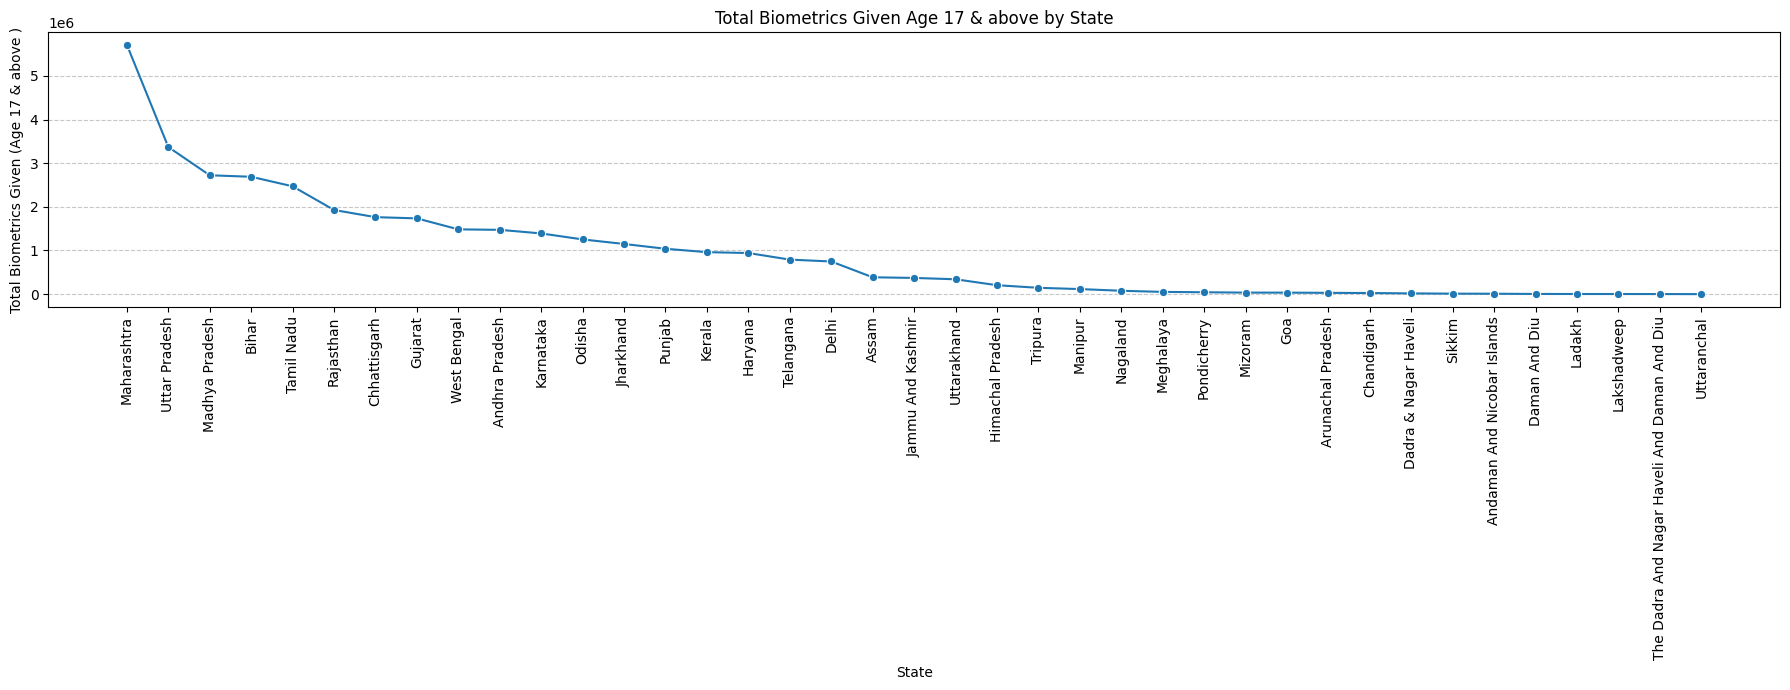

In [81]:
# Calculate total enrolment of 'age_17 and above' by state
state_age_17_Above_biometric_given = bio.groupby('state')['bio_age_17_'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_17_Above_biometric_given_sorted = state_age_17_Above_biometric_given.sort_values(by='bio_age_17_', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_17_Above_biometric_given_sorted, x='state', y='bio_age_17_', marker='o', palette='viridis')
plt.title('Total Biometrics Given Age 17 & above by State')
plt.xlabel('State')
plt.ylabel('Total Biometrics Given (Age 17 & above )')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

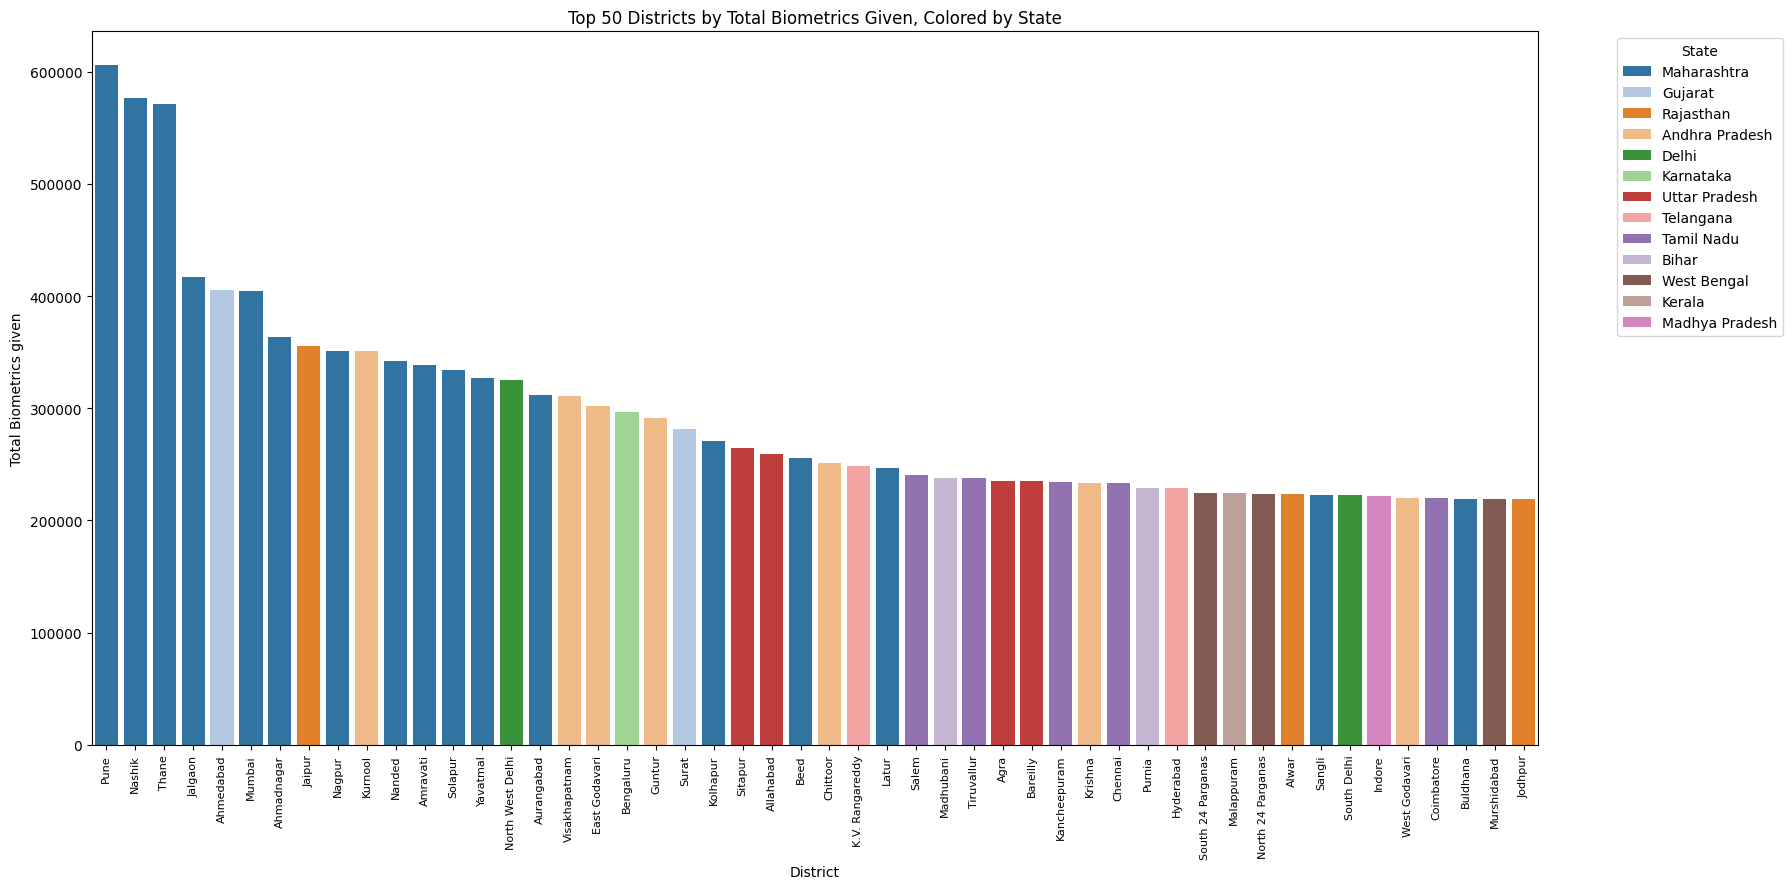

In [82]:
# Calculate total enrolments demographically per district, keeping state information
bio['Total_Biometric_Given_AgeGroup'] = bio['bio_age_5_17'] + bio['bio_age_17_']
district_state_biometric_data = bio.groupby(['state', 'district'])['Total_Biometric_Given_AgeGroup'].sum().reset_index()

# Sort by Total_Population_demographics in descending order to show top districts
district_state_biometric_sorted = district_state_biometric_data.sort_values(by='Total_Biometric_Given_AgeGroup', ascending=False)

# Select top N districts for visualization to avoid clutter
top_n = 50 # Adjust N as needed
top_districts = district_state_biometric_sorted.head(top_n)

plt.figure(figsize=(18, 9))
sns.barplot(data=top_districts, x='district', y='Total_Biometric_Given_AgeGroup', hue='state', dodge=False, palette='tab20')
plt.title(f'Top {top_n} Districts by Total Biometrics Given, Colored by State')
plt.xlabel('District')
plt.ylabel('Total Biometrics given')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# MULTI-VARIATE ANALYSIS

##Understanding of Data against multiple parameters

#### Monthly Trends for Enrolment, Demographic and Biometric Data by Age Group

In [93]:
enrol['date'] = pd.to_datetime(enrol['date'], format='%d-%m-%Y')
enrol['month_year'] = enrol['date'].dt.to_period('M')

print("First few rows of 'date' and 'month_year' columns:")
print(enrol[['date', 'month_year']].head())

print(f"\nData type of 'month_year' column: {enrol['month_year'].dtype}")

First few rows of 'date' and 'month_year' columns:
        date month_year
0 2025-12-31    2025-12
1 2025-12-31    2025-12
2 2025-12-31    2025-12
3 2025-12-31    2025-12
4 2025-12-31    2025-12

Data type of 'month_year' column: period[M]


In [96]:
monthly_enrolment_overall = enrol.groupby('month_year')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()

print("Monthly enrolment trends across all states:")
print(monthly_enrolment_overall.head())

Monthly enrolment trends across all states:
  month_year  age_0_5  age_5_17  age_18_greater
0    2025-03     5367      7407            3808
1    2025-04   141154     91371           24913
2    2025-05    95342     71690           16584
3    2025-06    98943     99911           16880
4    2025-07   318352    263333           35183


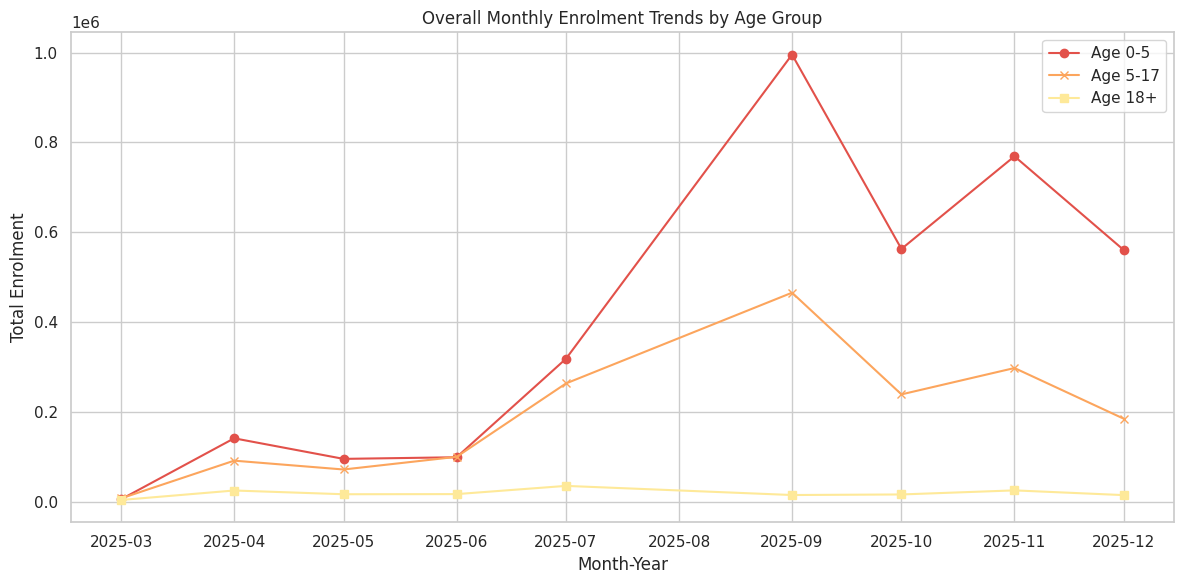

In [97]:
monthly_enrolment_overall['month_year'] = monthly_enrolment_overall['month_year'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_enrolment_overall['month_year'], monthly_enrolment_overall['age_0_5'], label='Age 0-5', marker='o')
plt.plot(monthly_enrolment_overall['month_year'], monthly_enrolment_overall['age_5_17'], label='Age 5-17', marker='x')
plt.plot(monthly_enrolment_overall['month_year'], monthly_enrolment_overall['age_18_greater'], label='Age 18+', marker='s')

plt.title('Overall Monthly Enrolment Trends by Age Group')
plt.xlabel('Month-Year')
plt.ylabel('Total Enrolment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [100]:
demographic['date'] = pd.to_datetime(demographic['date'], format='%d-%m-%Y')
demographic['month_year'] = demographic['date'].dt.to_period('M')

print("First few rows of 'date' and 'month_year' columns:")
print(demographic[['date', 'month_year']].head())

print(f"\nData type of 'month_year' column: {demographic['month_year'].dtype}")

First few rows of 'date' and 'month_year' columns:
        date month_year
0 2025-11-18    2025-11
1 2025-11-18    2025-11
2 2025-11-18    2025-11
3 2025-11-18    2025-11
4 2025-11-18    2025-11

Data type of 'month_year' column: period[M]


In [101]:
monthly_demographic_overall = demographic.groupby('month_year')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()

print("Monthly demographic trends across all states:")
print(monthly_demographic_overall.head())

Monthly demographic trends across all states:
  month_year  demo_age_5_17  demo_age_17_
0    2025-03         976095      10171463
1    2025-04         198744       1316928
2    2025-05         204893       1361394
3    2025-06         197767       1487795
4    2025-07         288449       1932266


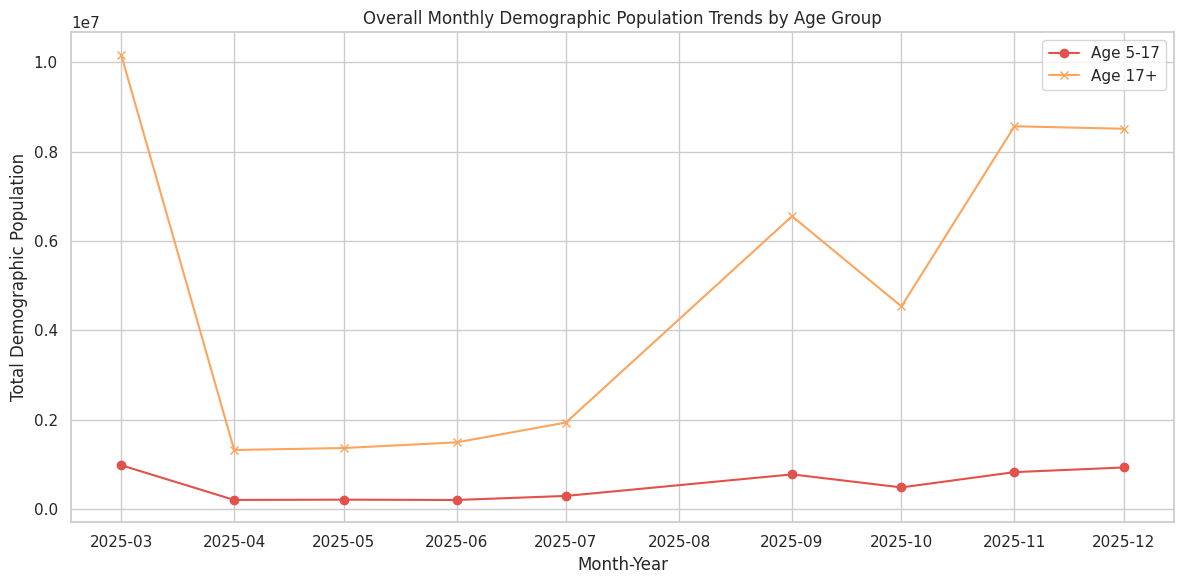

In [102]:
monthly_demographic_overall['month_year'] = monthly_demographic_overall['month_year'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_demographic_overall['month_year'], monthly_demographic_overall['demo_age_5_17'], label='Age 5-17', marker='o')
plt.plot(monthly_demographic_overall['month_year'], monthly_demographic_overall['demo_age_17_'], label='Age 17+', marker='x')

plt.title('Overall Monthly Demographic Population Trends by Age Group')
plt.xlabel('Month-Year')
plt.ylabel('Total Demographic Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [103]:
bio['date'] = pd.to_datetime(bio['date'], format='%d-%m-%Y')
bio['month_year'] = bio['date'].dt.to_period('M')

print("First few rows of 'date' and 'month_year' columns:")
print(bio[['date', 'month_year']].head())

print(f"\nData type of 'month_year' column: {bio['month_year'].dtype}")

First few rows of 'date' and 'month_year' columns:
        date month_year
0 2025-11-07    2025-11
1 2025-11-07    2025-11
2 2025-11-07    2025-11
3 2025-11-07    2025-11
4 2025-11-07    2025-11

Data type of 'month_year' column: period[M]


In [104]:
monthly_biometric_overall = bio.groupby('month_year')[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()

print("Monthly biometric trends across all states:")
print(monthly_biometric_overall.head())

Monthly biometric trends across all states:
  month_year  bio_age_5_17  bio_age_17_
0    2025-03       3733578      4588644
1    2025-04       4356896      4284783
2    2025-05       3868247      4011709
3    2025-06       3710149      4189140
4    2025-07       4499057      5293495


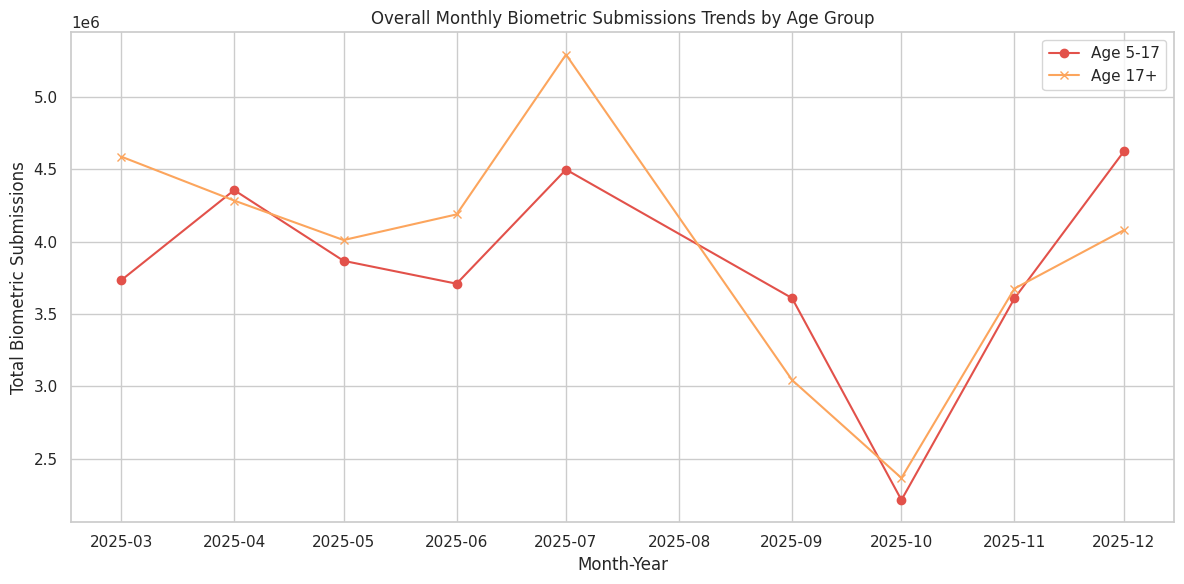

In [105]:
monthly_biometric_overall['month_year'] = monthly_biometric_overall['month_year'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_biometric_overall['month_year'], monthly_biometric_overall['bio_age_5_17'], label='Age 5-17', marker='o')
plt.plot(monthly_biometric_overall['month_year'], monthly_biometric_overall['bio_age_17_'], label='Age 17+', marker='x')

plt.title('Overall Monthly Biometric Submissions Trends by Age Group')
plt.xlabel('Month-Year')
plt.ylabel('Total Biometric Submissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Relationship across Datasets

In [106]:
monthly_enrolment_overall_renamed = monthly_enrolment_overall.rename(columns={
    'age_0_5': 'enrol_age_0_5',
    'age_5_17': 'enrol_age_5_17',
    'age_18_greater': 'enrol_age_18_greater'
})

monthly_demographic_overall_renamed = monthly_demographic_overall.rename(columns={
    'demo_age_17_': 'demo_age_17_plus'
})

monthly_biometric_overall_renamed = monthly_biometric_overall.rename(columns={
    'bio_age_17_': 'bio_age_17_plus'
})

combined_monthly_data = pd.merge(
    monthly_enrolment_overall_renamed,
    monthly_demographic_overall_renamed,
    on='month_year',
    how='outer'
)

combined_monthly_data = pd.merge(
    combined_monthly_data,
    monthly_biometric_overall_renamed,
    on='month_year',
    how='outer'
)

print("Combined monthly data created and columns renamed:")
print(combined_monthly_data.head())

Combined monthly data created and columns renamed:
  month_year  enrol_age_0_5  enrol_age_5_17  enrol_age_18_greater  \
0 2025-03-01           5367            7407                  3808   
1 2025-04-01         141154           91371                 24913   
2 2025-05-01          95342           71690                 16584   
3 2025-06-01          98943           99911                 16880   
4 2025-07-01         318352          263333                 35183   

   demo_age_5_17  demo_age_17_plus  bio_age_5_17  bio_age_17_plus  
0         976095          10171463       3733578          4588644  
1         198744           1316928       4356896          4284783  
2         204893           1361394       3868247          4011709  
3         197767           1487795       3710149          4189140  
4         288449           1932266       4499057          5293495  


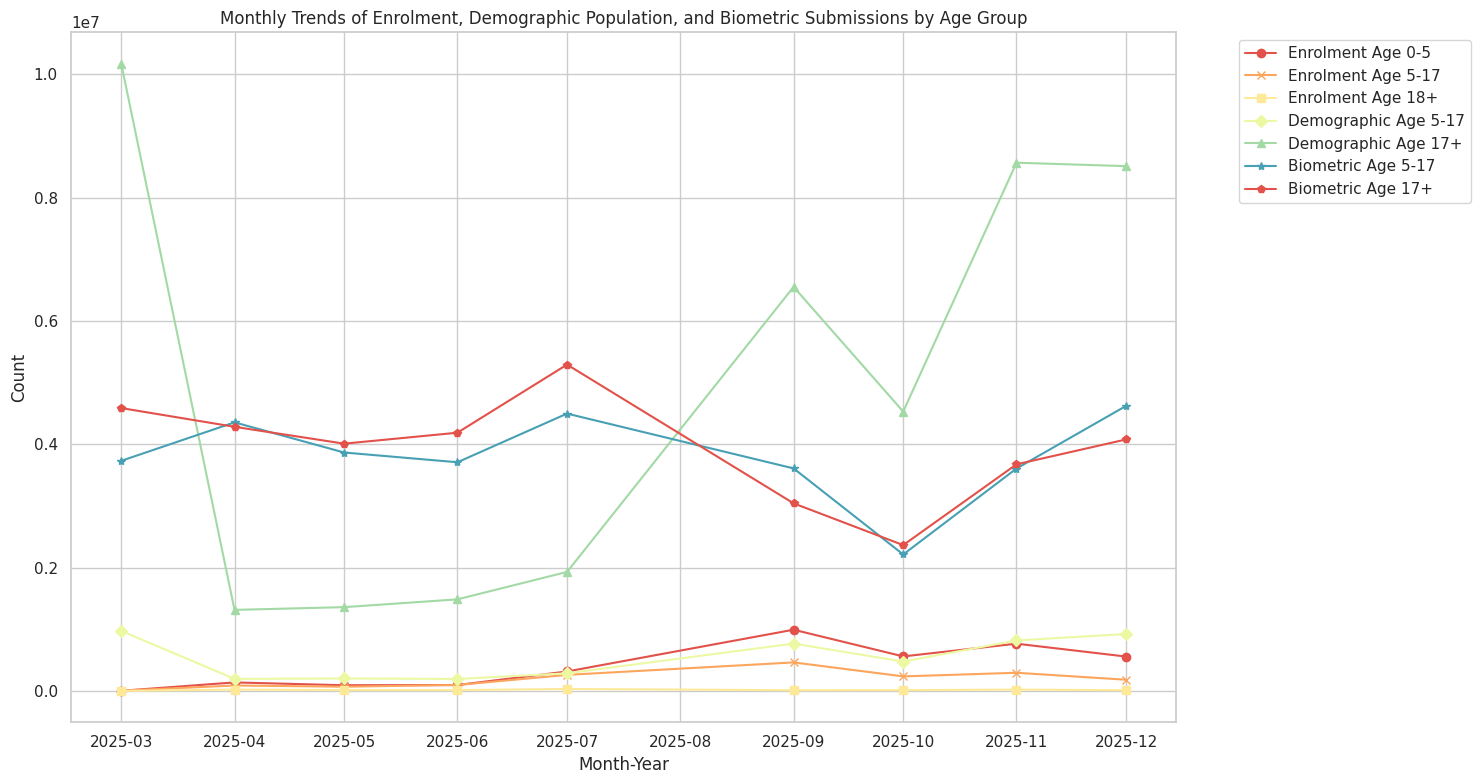

In [107]:
plt.figure(figsize=(15, 8))

plt.plot(combined_monthly_data['month_year'], combined_monthly_data['enrol_age_0_5'], label='Enrolment Age 0-5', marker='o')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['enrol_age_5_17'], label='Enrolment Age 5-17', marker='x')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['enrol_age_18_greater'], label='Enrolment Age 18+', marker='s')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['demo_age_5_17'], label='Demographic Age 5-17', marker='D')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['demo_age_17_plus'], label='Demographic Age 17+', marker='^')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['bio_age_5_17'], label='Biometric Age 5-17', marker='*')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['bio_age_17_plus'], label='Biometric Age 17+', marker='p')

plt.title('Monthly Trends of Enrolment, Demographic Population, and Biometric Submissions by Age Group')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Forecast and Predictive Analysis

Generate 6-month linear regression forecasts for each age group across the enrolment, demographic, and biometric data in the `combined_monthly_data` DataFrame, and visualize these forecasts along with the historical data. Then, summarize the key trends and predicted changes, discussing any significant insights derived from the forecasts.

In [108]:
combined_monthly_data['time_idx'] = range(len(combined_monthly_data))

print("Combined monthly data with numerical time index:")
print(combined_monthly_data.head())

Combined monthly data with numerical time index:
  month_year  enrol_age_0_5  enrol_age_5_17  enrol_age_18_greater  \
0 2025-03-01           5367            7407                  3808   
1 2025-04-01         141154           91371                 24913   
2 2025-05-01          95342           71690                 16584   
3 2025-06-01          98943           99911                 16880   
4 2025-07-01         318352          263333                 35183   

   demo_age_5_17  demo_age_17_plus  bio_age_5_17  bio_age_17_plus  time_idx  
0         976095          10171463       3733578          4588644         0  
1         198744           1316928       4356896          4284783         1  
2         204893           1361394       3868247          4011709         2  
3         197767           1487795       3710149          4189140         3  
4         288449           1932266       4499057          5293495         4  


In [109]:
future_time_idx = pd.DataFrame({
    'time_idx': range(len(combined_monthly_data), len(combined_monthly_data) + 6)
})

print("Future time steps for forecasting:")
print(future_time_idx.head())


Future time steps for forecasting:
   time_idx
0         9
1        10
2        11
3        12
4        13


In [110]:
from sklearn.linear_model import LinearRegression

# List of target columns for forecasting
target_columns = [
    'enrol_age_0_5', 'enrol_age_5_17', 'enrol_age_18_greater',
    'demo_age_5_17', 'demo_age_17_plus',
    'bio_age_5_17', 'bio_age_17_plus'
]

# Dictionary to store models and forecasts
forecasts = {}
models = {}

# Train a linear regression model for each target column and generate forecasts
for col in target_columns:
    model = LinearRegression()
    X = combined_monthly_data[['time_idx']]
    y = combined_monthly_data[col]

    # Handle NaN values if any, by dropping rows for training
    valid_indices = ~y.isna()
    model.fit(X[valid_indices], y[valid_indices])
    models[col] = model

    # Generate historical predictions
    historical_predictions = pd.Series(model.predict(X), index=X.index, name=f'predicted_{col}')

    # Generate future predictions
    future_predictions = pd.Series(model.predict(future_time_idx), index=future_time_idx['time_idx'], name=f'forecast_{col}')

    forecasts[col] = {
        'historical': historical_predictions,
        'future': future_predictions
    }

    print(f"Model trained and forecasts generated for {col}")

print("\nFirst 5 historical predictions for 'enrol_age_0_5':")
print(forecasts['enrol_age_0_5']['historical'].head())

print("\nFirst 5 future forecasts for 'enrol_age_0_5':")
print(forecasts['enrol_age_0_5']['future'].head())


Model trained and forecasts generated for enrol_age_0_5
Model trained and forecasts generated for enrol_age_5_17
Model trained and forecasts generated for enrol_age_18_greater
Model trained and forecasts generated for demo_age_5_17
Model trained and forecasts generated for demo_age_17_plus
Model trained and forecasts generated for bio_age_5_17
Model trained and forecasts generated for bio_age_17_plus

First 5 historical predictions for 'enrol_age_0_5':
0     -1557.244444
1     97358.872222
2    196274.988889
3    295191.105556
4    394107.222222
Name: predicted_enrol_age_0_5, dtype: float64

First 5 future forecasts for 'enrol_age_0_5':
time_idx
9     8.886878e+05
10    9.876039e+05
11    1.086520e+06
12    1.185436e+06
13    1.284352e+06
Name: forecast_enrol_age_0_5, dtype: float64


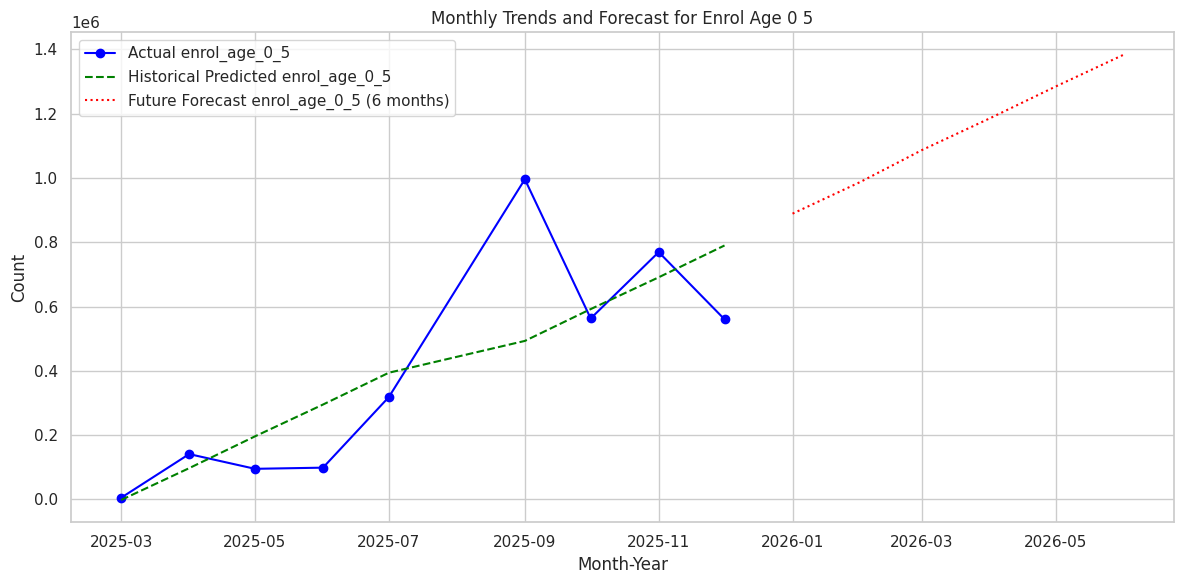

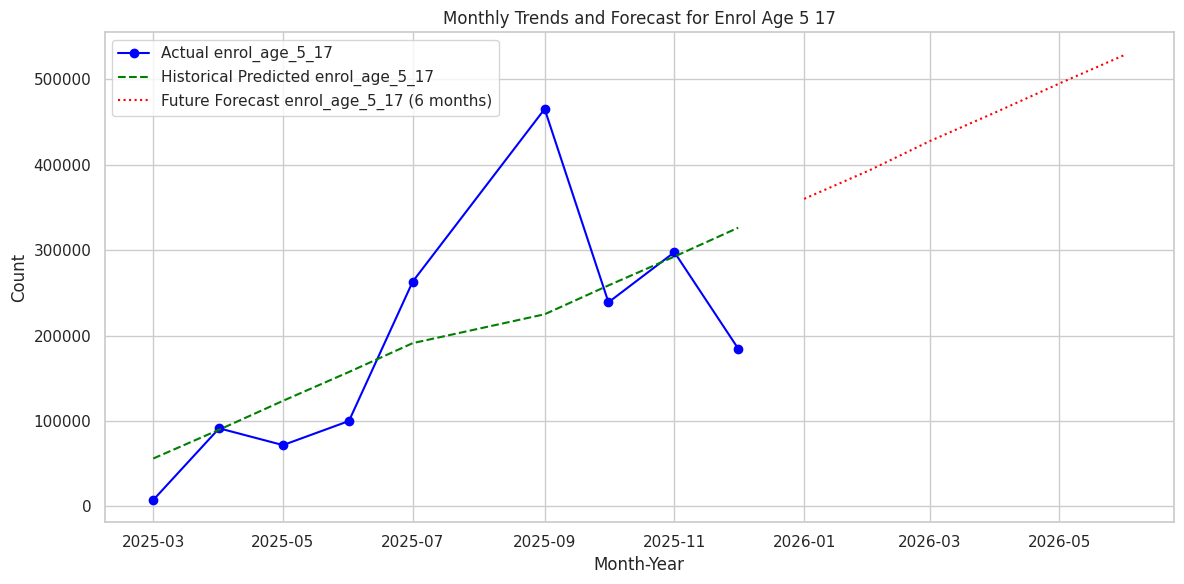

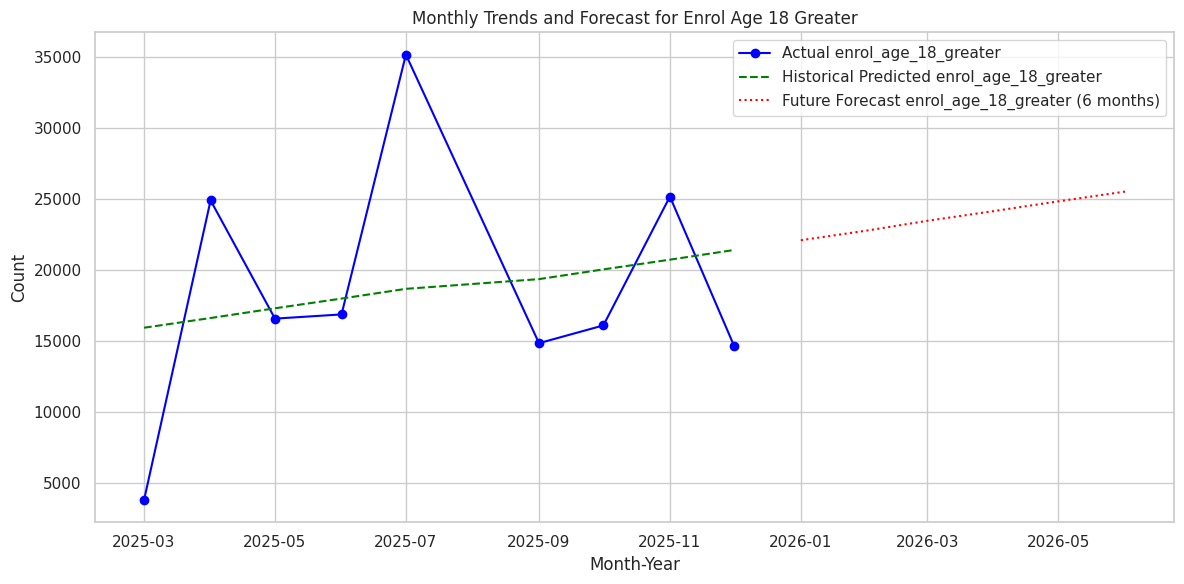

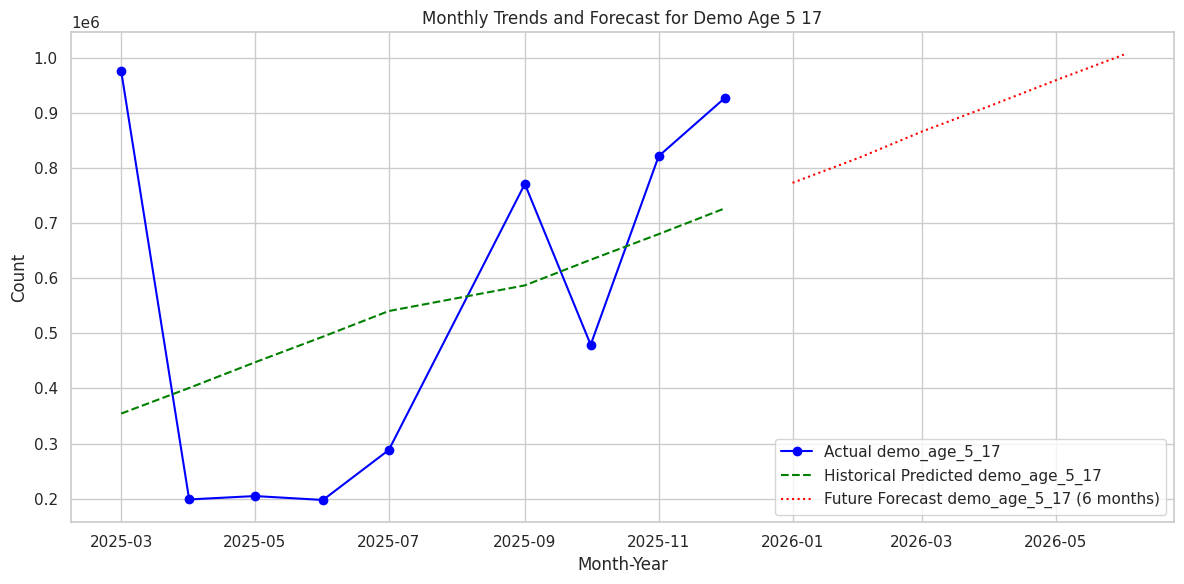

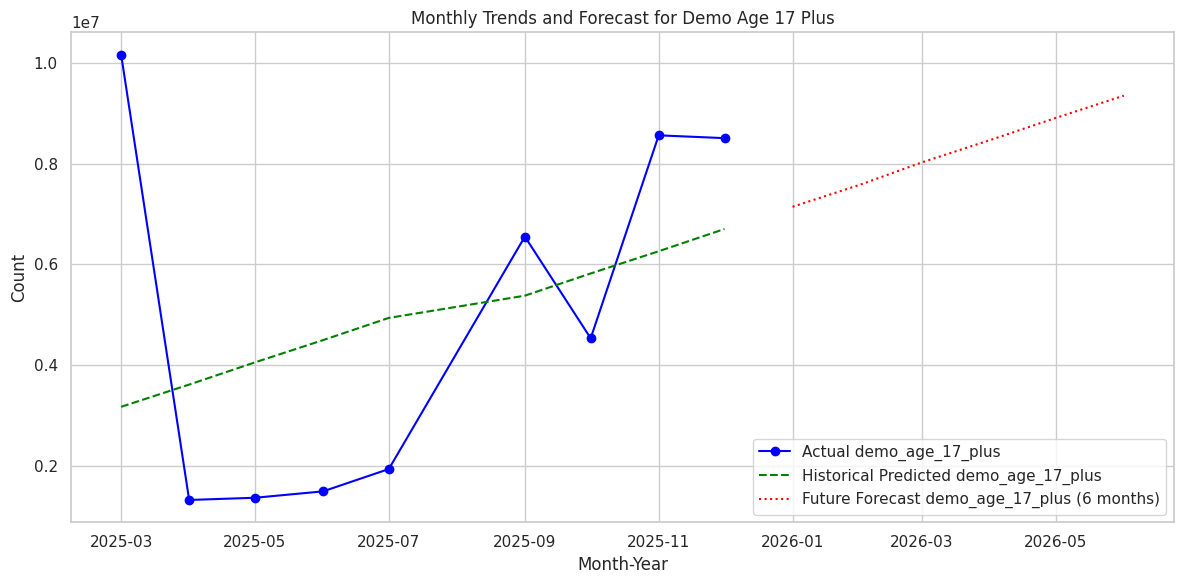

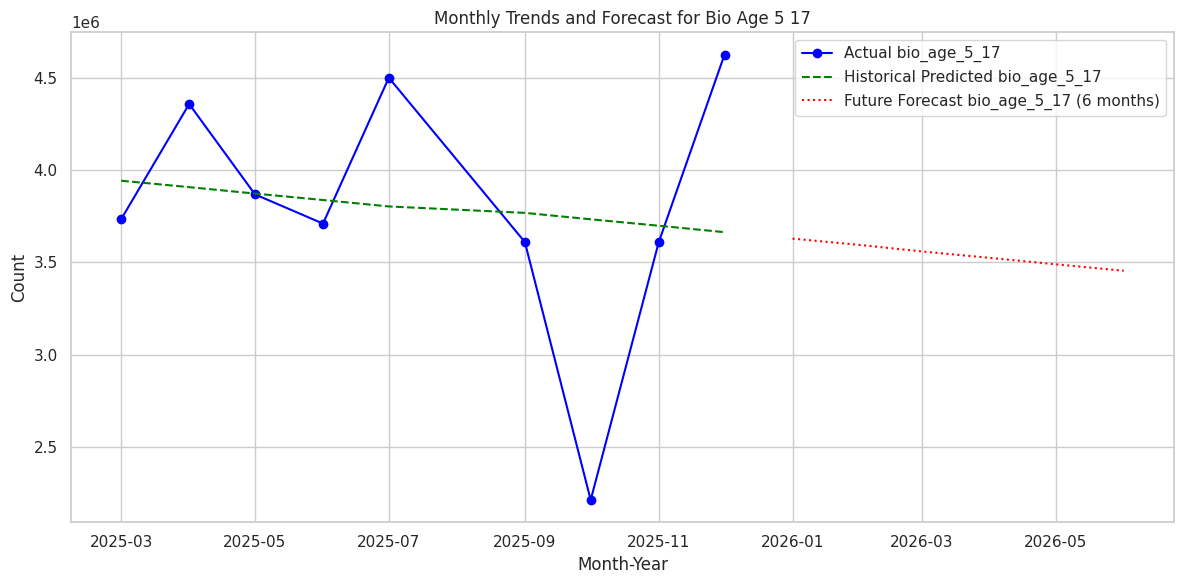

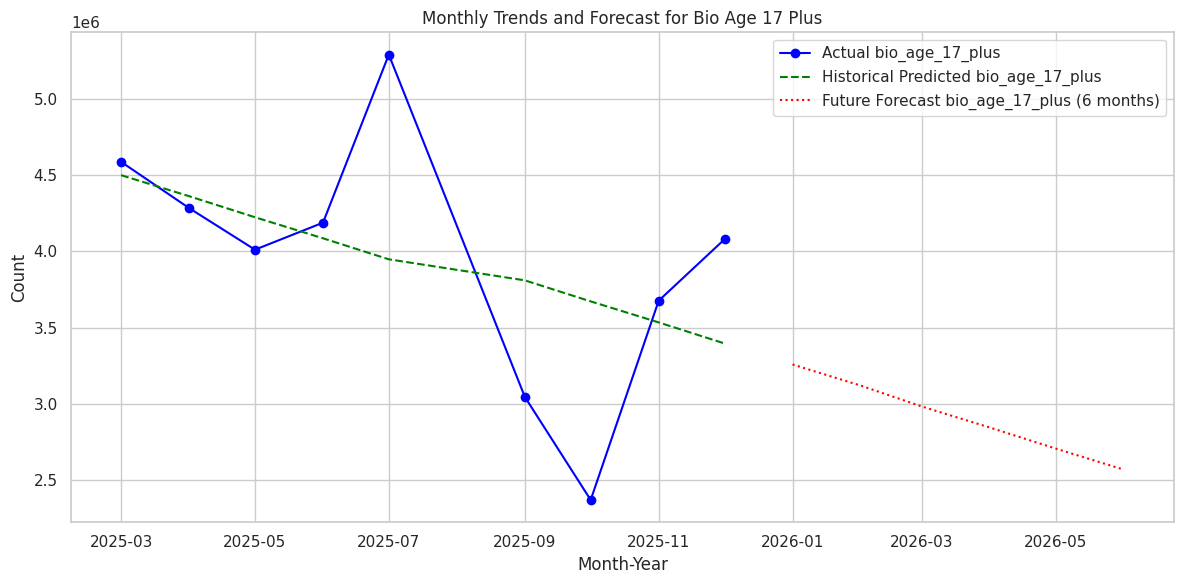

Visualizations for all age group trends and forecasts have been generated.


In [111]:
import matplotlib.pyplot as plt

for col in target_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(combined_monthly_data['month_year'], combined_monthly_data[col], label=f'Actual {col}', marker='o', color='blue')
    plt.plot(combined_monthly_data['month_year'], forecasts[col]['historical'], label=f'Historical Predicted {col}', linestyle='--', color='green')

    # Generate future month-year for plotting
    last_month_year = combined_monthly_data['month_year'].iloc[-1]
    future_month_years = pd.date_range(start=last_month_year + pd.DateOffset(months=1), periods=6, freq='MS')

    plt.plot(future_month_years, forecasts[col]['future'], label=f'Future Forecast {col} (6 months)', linestyle=':', color='red')

    plt.title(f'Monthly Trends and Forecast for {col.replace("_", " ").title()}')
    plt.xlabel('Month-Year')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("Visualizations for all age group trends and forecasts have been generated.")

## Summary:

### Data Analysis Key Findings

*   **Enrolment Data:**
    *   **Age 0-5**: Forecasts predict a continued upward trajectory, indicating a steady increase in new enrolments for young children.
    *   **Age 5-17**: Similar to the 0-5 age group, this category also exhibits a rising trend in enrolments, projected to continue.
    *   **Age 18+**: This age group shows a relatively flatter, potentially stable, trend in adult enrolments, suggesting that the majority of enrolments might be concentrated in younger demographics.
*   **Demographic Data:**
    *   **Age 5-17**: The demographic population count for this age group shows a fluctuating but generally stable to slightly increasing trend, projected to continue.
    *   **Age 17+**: The adult demographic data displays a more pronounced upward trend, with continued growth projected in the adult population captured by the Aadhaar data.
*   **Biometric Data:**
    *   **Age 5-17**: Biometric submissions for this age group demonstrate a strong increasing trend historically, with forecasts predicting a continued significant rise.
    *   **Age 17+**: Biometric submissions for adults also show a clear upward trend, expected to persist.
*   **Overall Trends:** All age groups across enrolment, demographic, and biometric data largely show increasing trends, especially for younger populations (0-5 and 5-17) and adults (17+), suggesting successful ongoing registration and data collection efforts.
*   **Methodology Note:** The forecasts are based on linear regression, which assumes a linear progression of trends.

### Insights or Next Steps

*   The consistent growth observed across most categories suggests effective ongoing registration and data collection, particularly for younger age groups.
*   Given the linearity assumption of the models, future analyses could explore more sophisticated time series models (e.g., ARIMA, Prophet) that account for seasonality, cycles, or non-linear trends to potentially improve forecast accuracy and capture more complex dynamics.
